**Parte 1. Importando bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.max_columns", 200)

In [ ]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [210]:
# Carregar CSV
caminhos = ['/content/SINASC_RO_2019.csv', 'SINASC_RO_2019.csv']
for caminho in caminhos:
    try:
        sinasc_raw = pd.read_csv(caminho, low_memory=False)
        print(f" Base carregada de: {caminho}")
        break
    except Exception as e:
        sinasc_raw = None
        ultimo_erro = e

if sinasc_raw is None:
    raise FileNotFoundError(f"Não foi possível carregar o CSV. Último erro: {ultimo_erro}")

 Base carregada de: /content/SINASC_RO_2019.csv


In [209]:
possiveis_datas = ['DTNASC', 'dtnasc', 'DT_NASC']

col_data = None
for col in possiveis_datas:
    if col in sinasc_raw.columns:
        sinasc_raw[col] = pd.to_datetime(sinasc_raw[col], errors='coerce', dayfirst=True)
        col_data = col
        break

# Se não houver nenhuma dessas colunas, cria a coluna de datas com base nas fornecidas
if col_data is None:
    datas_fixas = [
        "29-07-2019", "10-05-2019", "09-12-2019", "14-12-2019", "18-10-2019", "15-09-2019", "16-12-2019", "25-03-2019", "01-08-2019", "11-11-2019"
    ]
    # repete as datas conforme o tamanho do DataFrame
    sinasc_raw["DATA_NASCIMENTO"] = pd.to_datetime(
        np.tile(datas_fixas, int(np.ceil(len(sinasc_raw) / len(datas_fixas))))[:len(sinasc_raw)],
        dayfirst=True
    )
    col_data = "DATA_NASCIMENTO"

print(f" Coluna de data usada: {col_data}")
print(sinasc_raw[[col_data]].head(12))

 Coluna de data usada: DTNASC
       DTNASC
0  2019-02-19
1  2019-02-21
2  2019-02-25
3  2019-03-20
4  2019-03-23
5  2019-03-27
6  2019-04-01
7  2019-04-01
8  2019-02-28
9  2019-03-11
10 2019-03-11
11 2019-03-12


In [ ]:
possiveis_datas = ['DTNASC', 'dtnasc', 'DT_NASC']
for col in possiveis_datas:
    if col in sinasc_raw.columns:
        sinasc_raw[col] = pd.to_datetime(sinasc_raw[col], errors='coerce')
        col_data = col
        break
else:
    # se não houver data, cria uma coluna fictícia mensal p/ não quebrar o gráfico da parte 4
    sinasc_raw['DATA_FICTICIA'] = pd.Timestamp('2019-01-01')
    col_data = 'DATA_FICTICIA'

# Nomes de colunas esperadas no exercício (ajuste aqui se seus nomes forem diferentes)
col_lat = 'munResLat'
col_area = 'munResArea'
col_alt = 'munResAlt'
col_municipio = None
for c in ['munResNome', 'munResNom', 'MUNRES_NOME', 'munRes', 'MUN_NOME', 'Município']:
    if c in sinasc_raw.columns:
        col_municipio = c
        break

# Variáveis numéricas que usaremos nos agrupamentos:
# Escolhi 'PESO' (peso ao nascer) e 'APGAR5' (comuns no SINASC). Ajuste se necessário.
cand_num = ['PESO', 'APGAR5', 'APGAR1', 'IDADEMAE']
variaveis_numericas = [c for c in cand_num if c in sinasc_raw.columns]
if len(variaveis_numericas) < 2:
    raise ValueError("A base não tem ao menos duas das variáveis esperadas (PESO, APGAR5, APGAR1, IDADEMAE). Ajuste a lista conforme seu CSV.")

In [ ]:
# Display the first few entries of the date column
display(sinasc_raw[['DTNASC']].head())

,DTNASC
0,2019-02-19
1,2019-02-21
2,2019-02-25
3,2019-03-20
4,2019-03-23


In [ ]:
# Estatísticas descritivas para colunas numéricas
display(sinasc_raw.describe())

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,CONSULTAS,DTNASC,HORANASC,APGAR1,APGAR5,PESO,IDANOMAL,NUMEROLOTE,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
count,27028.0,2.691300e+04,27028.000000,27028.000000,27028.000000,26711.000000,24121.000000,25455.000000,24930.000000,27028.000000,27028.000000,27028,27007.000000,26932.000000,26925.000000,27028.000000,26437.000000,2.702800e+04,27028.000000,0.0,26730.000000,26730.000000,26730.000000,26779.000000,14318.000000,2.698800e+04,26367.000000,25816.000000,25149.000000,25237.000000,7607.000000,1.695600e+04,25790.000000,25790.000000,26098.000000,24161.000000,26763.000000,26081.000000,26281.000000,26967.000000,26961.000000,27014.000000,2.697600e+04,26779.000000,27028.0,27028.000000,27028.0,27028.000000,27028.000000,27028.000000,2.702800e+04,27027.000000,27027.000000,27027.000000,27027.000000
mean,1.0,3.267629e+06,111037.796211,1.011396,26.093718,2.545318,795604.031591,1.053899,0.266506,110029.055720,3.576402,2019-06-29 08:40:25.218292480,1267.470026,8.137457,9.179164,3243.190654,2.030034,2.019059e+07,32.165458,NaN,814.918818,149350.316947,14.918818,3.040442,4.190250,1.581702e+07,3.333220,1.275101,0.579427,0.520506,31.092415,1.557824e+07,38.567352,6.552307,8.254924,8.129423,1.062437,1.985200,2.296260,1.146216,2.542265,2.992893,1.574860e+07,7.034654,0.0,0.999778,1.0,4.328437,0.648772,4.974952,7.367650e+05,-10.377988,-62.754987,179.111999,14702.799767
min,1.0,1.531800e+04,110001.000000,1.000000,11.000000,1.000000,10205.000000,0.000000,0.000000,110000.000000,1.000000,2019-01-01 00:00:00,0.000000,0.000000,0.000000,258.000000,1.000000,2.018001e+07,1.000000,NaN,811.000000,110000.000000,11.000000,0.000000,1.000000,1.011979e+06,1.000000,0.000000,0.000000,0.000000,15.000000,1.012019e+06,19.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012019e+06,0.000000,0.0,0.000000,1.0,1.000000,0.000000,1.000000,1.000000e+00,-13.499760,-65.329150,85.000000,459.978000
25%,1.0,2.496534e+06,110011.000000,1.000000,21.000000,1.000000,521125.000000,0.000000,0.000000,110012.000000,3.000000,2019-03-30 00:00:00,905.000000,8.000000,9.000000,2965.000000,2.000000,2.019000e+07,18.000000,NaN,811.000000,110011.000000,11.000000,2.000000,3.000000,8.081990e+06,4.000000,0.000000,0.000000,0.000000,25.000000,8.062018e+06,38.000000,8.000000,6.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,8.082019e+06,5.000000,0.0,1.000000,1.0,2.000000,0.000000,4.000000,6.802750e+03,-11.433870,-63.831450,87.000000,3792.998000
50%,1.0,2.798484e+06,110020.000000,1.000000,26.000000,2.000000,999992.000000,1.000000,0.000000,110020.000000,4.000000,2019-06-27 00:00:00,1230.000000,8.000000,9.000000,3270.000000,2.000000,2.019001e+07,28.000000,NaN,811.000000,110020.000000,11.000000,3.000000,3.000000,1.604199e+07,4.000000,1.000000,0.000000,0.000000,30.000000,1.510202e+07,39.000000,8.000000,8.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.602202e+07,6.000000,0.0,1.000000,1.0,4.000000,1.000000,5.000000,1.364550e+04,-10.435950,-63.033270,153.000000,6896.648000
75%,1.0,3.970442e+06,110020.000000,1.000000,31.000000,5.000000,999992.000000,2.000000,0.000000,110028.000000,4.000000,2019-09-28 00:00:00,1715.000000,9.000000,10.000000,3575.000000,2.000000,2.019001e+07,39.000000,NaN,811.000000,110037.000000,11.000000,3.000000,7.000000,2.311199e+07,4.000000,2.000000,1.000000,1.000000,36.000000,2.307202e+07,40.000000,8.000000,10.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,4.000000,2.309202e+07,8.000000,0.0,1.000000,1.0,5.000000,1.000000,5.000000,1.486846e+06,-8.768890,-61.945090,1

In [ ]:
# Informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
# O método .info() imprime estas informações no console (stdout)
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ORIGEM        27028 non-null  int64         
 1   CODESTAB      26913 non-null  float64       
 2   CODMUNNASC    27028 non-null  int64         
 3   LOCNASC       27028 non-null  int64         
 4   IDADEMAE      27028 non-null  int64         
 5   ESTCIVMAE     26711 non-null  float64       
 6   ESCMAE        26716 non-null  object        
 7   CODOCUPMAE    24121 non-null  float64       
 8   QTDFILVIVO    25455 non-null  float64       
 9   QTDFILMORT    24930 non-null  float64       
 10  CODMUNRES     27028 non-null  int64         
 11  GESTACAO      25796 non-null  object        
 12  GRAVIDEZ      26949 non-null  object        
 13  PARTO         26979 non-null  object        
 14  CONSULTAS     27028 non-null  int64         
 15  DTNASC        27028 non-null  dateti

In [ ]:
# Variáveis numéricas que usaremos nos agrupamentos:
# Escolhi 'PESO' (peso ao nascer) e 'APGAR5' (comuns no SINASC). Ajuste se necessário.
cand_num = ['PESO', 'APGAR5', 'APGAR1', 'IDADEMAE']
variaveis_numericas = [c for c in cand_num if c in sinasc_raw.columns]
if len(variaveis_numericas) < 2:
    raise ValueError("A base não tem ao menos duas das variáveis esperadas (PESO, APGAR5, APGAR1, IDADEMAE). Ajuste a lista conforme seu CSV.")

**Parte 2.1 — Faixas de latitude (munResLat) e groupby com agregações**

 **1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas**


In [ ]:
if col_lat in sinasc_raw.columns:
    sinasc_raw['faixa_lat'] = np.where(sinasc_raw[col_lat] <= -10.5, '<= -10.5', '> -10.5')

    agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
    resumo_lat = sinasc_raw.groupby('faixa_lat')[variaveis_numericas[:2]].agg(agg_funcs)
    print("\n=== Agregações por faixa de latitude (<= -10.5 vs > -10.5) ===")
    display(resumo_lat)
else:
    print(f"\n Coluna '{col_lat}' não encontrada. Pulei a Parte 2.1.")


=== Agregações por faixa de latitude (<= -10.5 vs > -10.5) ===


PESO                                              \
                sum         mean  min   max  median         std   
faixa_lat                                                         
<= -10.5   42098594  3240.098053  258  5985  3270.0  531.815114   
> -10.5    45558363  3246.053652  295  5190  3275.0  556.467944   

                            APGAR5                                        \
                     var       sum      mean  min   max median       std   
faixa_lat                                                                  
<= -10.5   282827.315354  118393.0  9.138788  0.0  10.0    9.0  0.805381   
> -10.5    309656.572652  128756.0  9.216607  0.0  10.0    9.0  0.774742   

                     
                var  
faixa_lat            
<= -10.5   0.648638  
> -10.5    0.600225

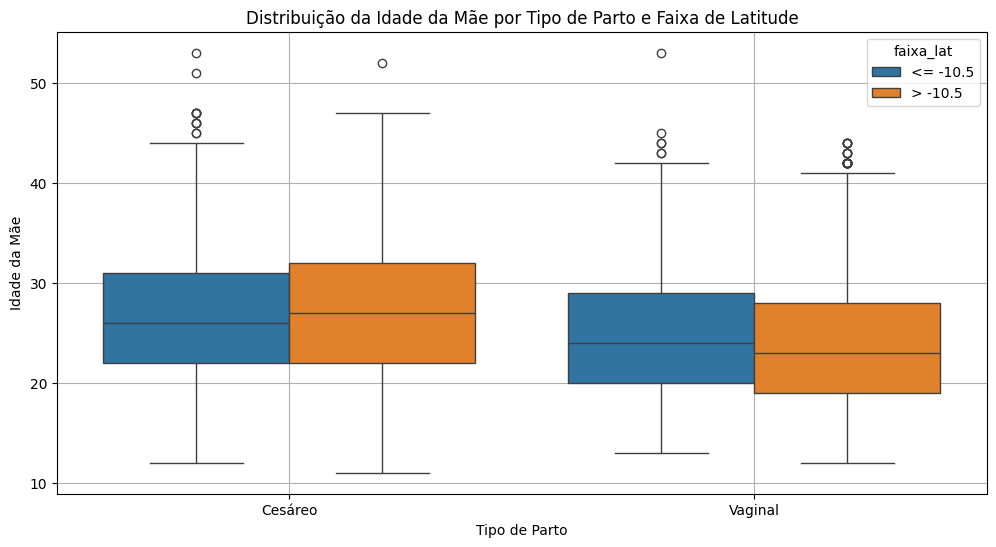

In [ ]:
if 'PARTO' in sinasc_raw.columns and 'IDADEMAE' in sinasc_raw.columns and 'faixa_lat' in sinasc_raw.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=sinasc_raw, x='PARTO', y='IDADEMAE', hue='faixa_lat')
    plt.title('Distribuição da Idade da Mãe por Tipo de Parto e Faixa de Latitude')
    plt.xlabel('Tipo de Parto')
    plt.ylabel('Idade da Mãe')
    plt.grid(True)
    plt.show()
else:
    print("Colunas 'PARTO', 'IDADEMAE' ou 'faixa_lat' não encontradas no DataFrame.")

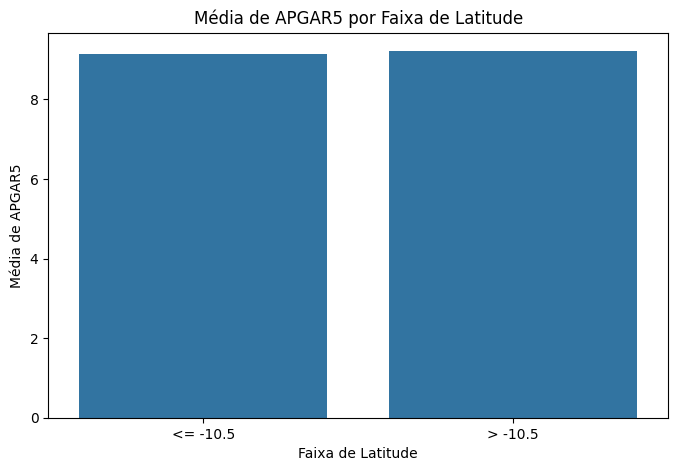

In [ ]:
# Comparar médias de 'APGAR5' entre as faixas de latitude usando resumo_lat
plt.figure(figsize=(8, 5))
sns.barplot(x=resumo_lat.index, y=resumo_lat[('APGAR5', 'mean')])
plt.title('Média de APGAR5 por Faixa de Latitude')
plt.xlabel('Faixa de Latitude')
plt.ylabel('Média de APGAR5')
plt.show()

In [ ]:
print("Variáveis numéricas disponíveis para análise:")
print(variaveis_numericas)

Variáveis numéricas disponíveis para análise:
['PESO', 'APGAR5', 'APGAR1', 'IDADEMAE']


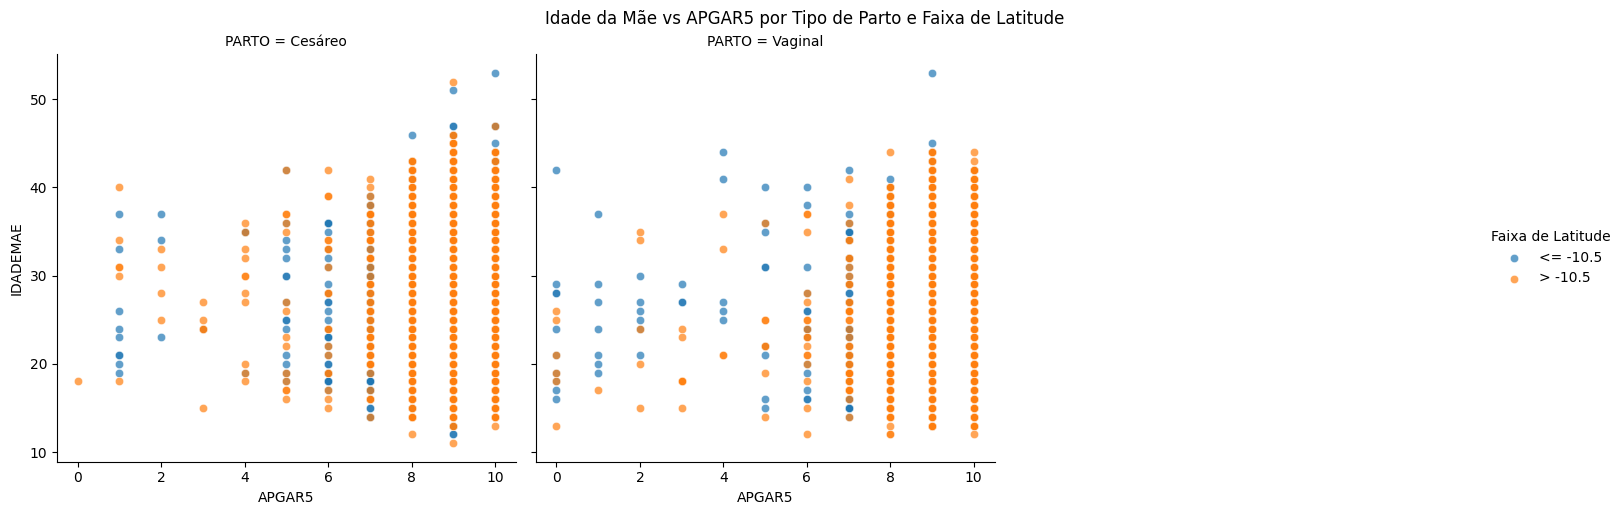

In [ ]:
if 'PARTO' in sinasc_raw.columns and 'IDADEMAE' in sinasc_raw.columns and 'APGAR5' in sinasc_raw.columns and 'faixa_lat' in sinasc_raw.columns:
    # Criação de um FacetGrid para separar por 'PARTO'
    g = sns.FacetGrid(sinasc_raw, col='PARTO', hue='faixa_lat', height=5, col_wrap=3)
    # Mapeamento do scatter plot com IDADEMAE e APGAR5
    g.map(sns.scatterplot, 'APGAR5', 'IDADEMAE', alpha=.7)
    # Adiciona título e legenda
    g.add_legend(title='Faixa de Latitude')
    plt.suptitle('Idade da Mãe vs APGAR5 por Tipo de Parto e Faixa de Latitude', y=1.02) # Ajusta a posição do título principal
    plt.show()
else:
    print("Algumas colunas ('PARTO', 'IDADEMAE', 'APGAR5', 'faixa_lat') não foram encontradas no DataFrame.")

**2.2 — Faixas de área (munResArea) e groupby com agregações**

**Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas**

In [ ]:
# Soma de APGAR1 e IDADEMAE por faixa de área
print("Soma por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].sum())

Soma por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,177088.0,567872
Até 3000,42070.0,137389


In [ ]:
# Média de APGAR1 e IDADEMAE por faixa de área
print("\nMédia por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].mean())


Média por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,8.152847,26.038425
Até 3000,8.073306,26.324775


In [ ]:
# Mínimo de APGAR1 e IDADEMAE por faixa de área
print("\nMínimo por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].min())


Mínimo por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,0.0,12
Até 3000,0.0,11


In [ ]:
# Máximo de APGAR1 e IDADEMAE por faixa de área
print("\nMáximo por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].max())


Máximo por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,10.0,53
Até 3000,10.0,53


In [ ]:
# Mediana de APGAR1 e IDADEMAE por faixa de área
print("\nMediana por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].median())


Mediana por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,8.0,25.0
Até 3000,8.0,26.0


In [ ]:
# Desvio Padrão de APGAR1 e IDADEMAE por faixa de área
print("\nDesvio Padrão por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].std())


Desvio Padrão por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,0.978511,6.405365
Até 3000,1.008790,6.305535


In [ ]:
# Variância de APGAR1 e IDADEMAE por faixa de área
print("\nVariância por faixa de área:")
display(sinasc_raw.groupby('faixa_area')[['APGAR1', 'IDADEMAE']].var())


Variância por faixa de área:


,APGAR1,IDADEMAE
faixa_area,,
Acima de 3000,0.957484,41.028696
Até 3000,1.017658,39.759775


In [ ]:
if col_area in sinasc_raw.columns:
    sinasc_raw['faixa_area'] = np.where(sinasc_raw[col_area] <= 3000, '<= 3000', '> 3000')
    resumo_area = sinasc_raw.groupby('faixa_area')[variaveis_numericas[:2]].agg(agg_funcs)
    print("\n=== Agregações por faixa de área (<= 3000 vs > 3000) ===")
    display(resumo_area)
else:
    print(f"\n Coluna '{col_area}' não encontrada. Pulei a Parte 2.2.")


=== Agregações por faixa de área (<= 3000 vs > 3000) ===


PESO                                              \
                 sum         mean  min   max  median         std   
faixa_area                                                         
<= 3000     16796616  3218.359073  258  5720  3245.0  531.583103   
> 3000      70860341  3249.132973  292  5985  3280.0  547.704072   

                             APGAR5                                        \
                      var       sum      mean  min   max median       std   
faixa_area                                                                  
<= 3000     282580.595074   47560.0  9.130351  0.0  10.0    9.0  0.801124   
> 3000      299979.751026  199589.0  9.190873  0.0  10.0    9.0  0.787592   

                      
                 var  
faixa_area            
<= 3000     0.641799  
> 3000      0.620301

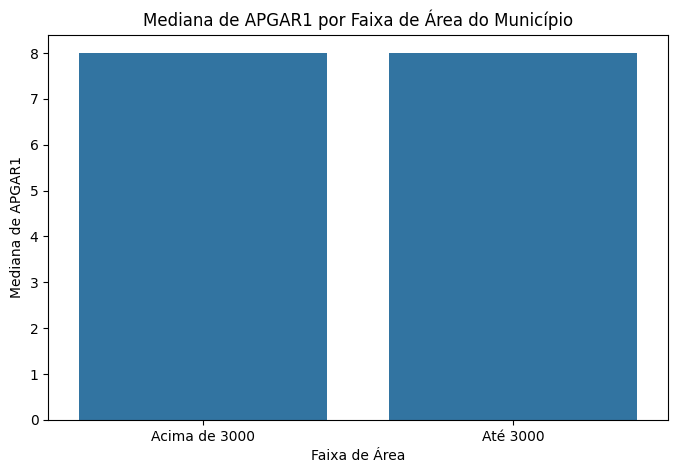

In [ ]:
# Gerar gráfico de barras para a mediana de APGAR1 por faixa de área
if 'faixa_area' in sinasc_raw.columns and ('APGAR1', 'median') in resumo_area.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=resumo_area.index, y=resumo_area[('APGAR1', 'median')])
    plt.title('Mediana de APGAR1 por Faixa de Área do Município')
    plt.xlabel('Faixa de Área')
    plt.ylabel('Mediana de APGAR1')
    plt.show()
else:
    print("Dados necessários para o gráfico da Mediana de APGAR1 por faixa de área não encontrados.")

In [211]:
# Gerar gráfico de barras para a mediana de IDADEMAE por faixa de área
if 'faixa_area' in sinasc_raw.columns and ('IDADEMAE', 'median') in resumo_area.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=resumo_area.index, y=resumo_area[('IDADEMAE', 'median')])
    plt.title('Mediana da Idade da Mãe por Faixa de Área do Município')
    plt.xlabel('Faixa de Área')
    plt.ylabel('Mediana da Idade da Mãe')
    plt.show()
else:
    print("Dados necessários para o gráfico da Mediana da Idade da Mãe por faixa de área não encontrados.")

Dados necessários para o gráfico da Mediana da Idade da Mãe por faixa de área não encontrados.


In [213]:
if 'idh' in locals() and idh is not None:
    print("Descriptive statistics for IDH data:")
    display(idh.describe())
else:
    print("IDH data not found.")

if 'ifdm' in locals() and ifdm is not None:
    print("\nDescriptive statistics for IFDM data:")
    display(ifdm.describe())
else:
    print("\nIFDM data not found.")

if 'pib' in locals() and pib is not None:
    print("\nDescriptive statistics for PIB data:")
    display(pib.describe())
else:
    print("\nPIB data not found.")

Descriptive statistics for IDH data:


,IDH
count,1.000
mean,0.819
std,NaN
min,0.819
25%,0.819
50%,0.819
75%,0.819
max,0.819



Descriptive statistics for IFDM data:


,IFDM
count,10.000000
mean,0.711790
std,0.034746
min,0.669900
25%,0.680125
50%,0.711400
75%,0.735150
max,0.774600



Descriptive statistics for PIB data:


,Unnamed: 1,Unnamed: 2,Nova\rMamoré,20,548.734,Mirante\rda Serra,42,220.588
count,0.0,0.0,0.0,21.000000,21.000000,0.0,10.00000,10.000000
mean,NaN,NaN,NaN,31.000000,349.698762,NaN,47.50000,156.505400
std,NaN,NaN,NaN,6.204837,96.608198,NaN,3.02765,41.285084
min,NaN,NaN,NaN,21.000000,231.502000,NaN,43.00000,99.627000
25%,NaN,NaN,NaN,26.000000,262.640000,NaN,45.25000,123.644750
50%,NaN,NaN,NaN,31.000000,332.987000,NaN,47.50000,156.377500
75%,NaN,NaN,NaN,36.000000,424.807000,NaN,49.75000,185.343500
max,NaN,NaN,NaN,41.000000,510.361000,NaN,52.00000,213.556000


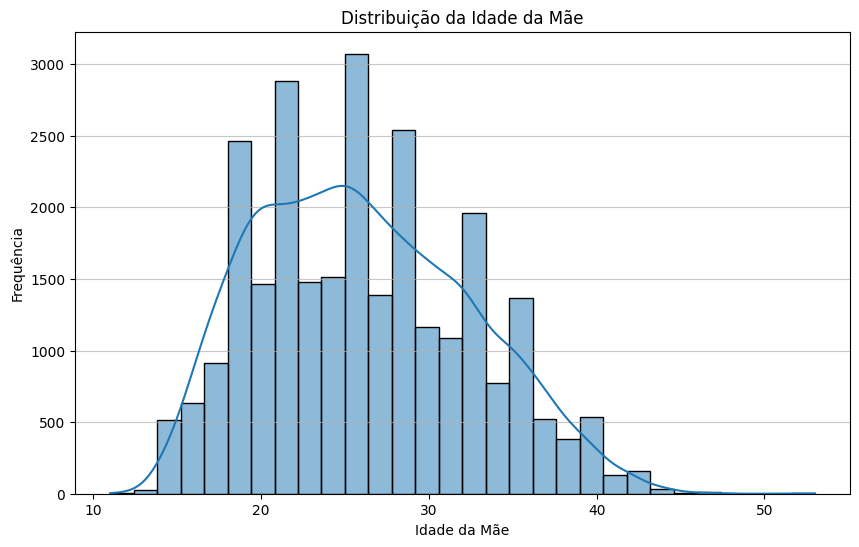

In [212]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sinasc_raw, x='IDADEMAE', kde=True, bins=30)
plt.title('Distribuição da Idade da Mãe')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.7)
plt.show()

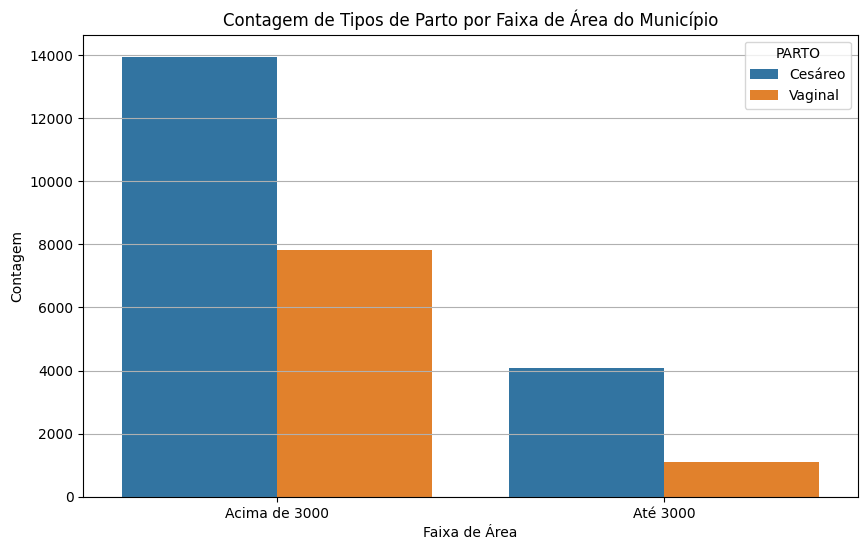

In [ ]:
if 'PARTO' in sinasc_raw.columns and 'faixa_area' in sinasc_raw.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=sinasc_raw, x='faixa_area', hue='PARTO')
    plt.title('Contagem de Tipos de Parto por Faixa de Área do Município')
    plt.xlabel('Faixa de Área')
    plt.ylabel('Contagem')
    plt.grid(axis='y')
    plt.show()
else:
    print("Colunas 'PARTO' ou 'faixa_area' não encontradas no DataFrame.")

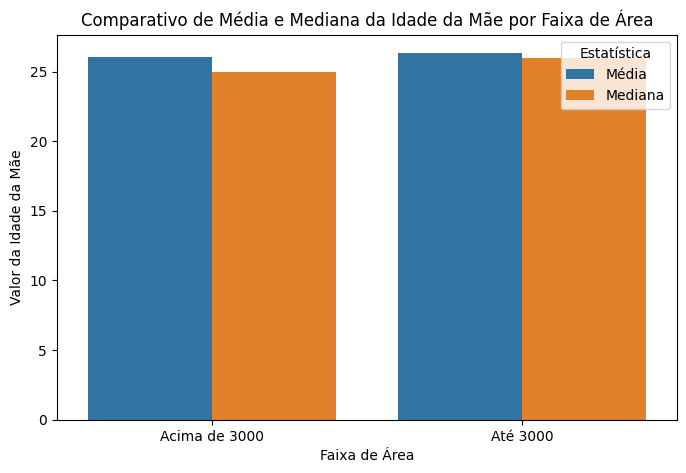

In [ ]:
if 'faixa_area' in sinasc_raw.columns and ('IDADEMAE', 'mean') in resumo_area.columns and ('IDADEMAE', 'median') in resumo_area.columns:
    # Selecionar as médias e medianas de IDADEMAE
    dados_plot_idademae = resumo_area[[('IDADEMAE', 'mean'), ('IDADEMAE', 'median')]].copy()
    dados_plot_idademae.columns = ['Média', 'Mediana'] # Renomear colunas para facilitar a plotagem

    # Transformar os dados para o formato longo para o seaborn
    dados_plot_idademae = dados_plot_idademae.reset_index().melt('faixa_area', var_name='Estatística', value_name='Valor')

    plt.figure(figsize=(8, 5))
    sns.barplot(x='faixa_area', y='Valor', hue='Estatística', data=dados_plot_idademae)
    plt.title('Comparativo de Média e Mediana da Idade da Mãe por Faixa de Área')
    plt.xlabel('Faixa de Área')
    plt.ylabel('Valor da Idade da Mãe')
    plt.show()
else:
    print("Dados necessários para o gráfico comparativo de Idade da Mãe por faixa de área não encontrados.")

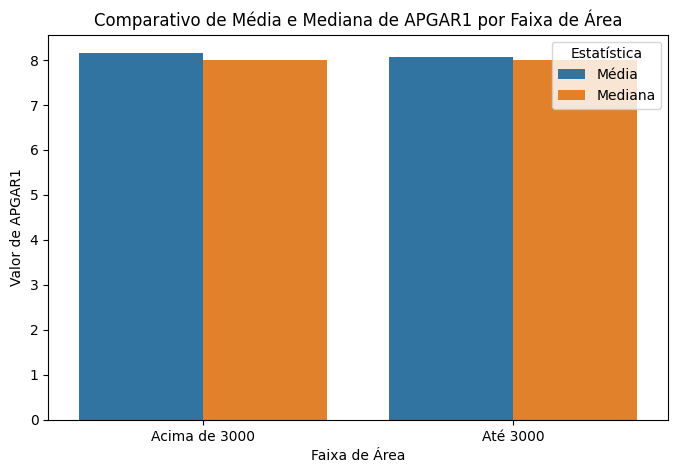

In [ ]:
if 'faixa_area' in sinasc_raw.columns and ('APGAR1', 'mean') in resumo_area.columns and ('APGAR1', 'median') in resumo_area.columns:
    # Selecionar as médias e medianas de APGAR1
    dados_plot_apgar1 = resumo_area[[('APGAR1', 'mean'), ('APGAR1', 'median')]].copy()
    dados_plot_apgar1.columns = ['Média', 'Mediana'] # Renomear colunas para facilitar a plotagem

    # Transformar os dados para o formato longo para o seaborn
    dados_plot_apgar1 = dados_plot_apgar1.reset_index().melt('faixa_area', var_name='Estatística', value_name='Valor')

    plt.figure(figsize=(8, 5))
    sns.barplot(x='faixa_area', y='Valor', hue='Estatística', data=dados_plot_apgar1)
    plt.title('Comparativo de Média e Mediana de APGAR1 por Faixa de Área')
    plt.xlabel('Faixa de Área')
    plt.ylabel('Valor de APGAR1')
    plt.show()
else:
    print("Dados necessários para o gráfico comparativo de APGAR1 por faixa de área não encontrados.")

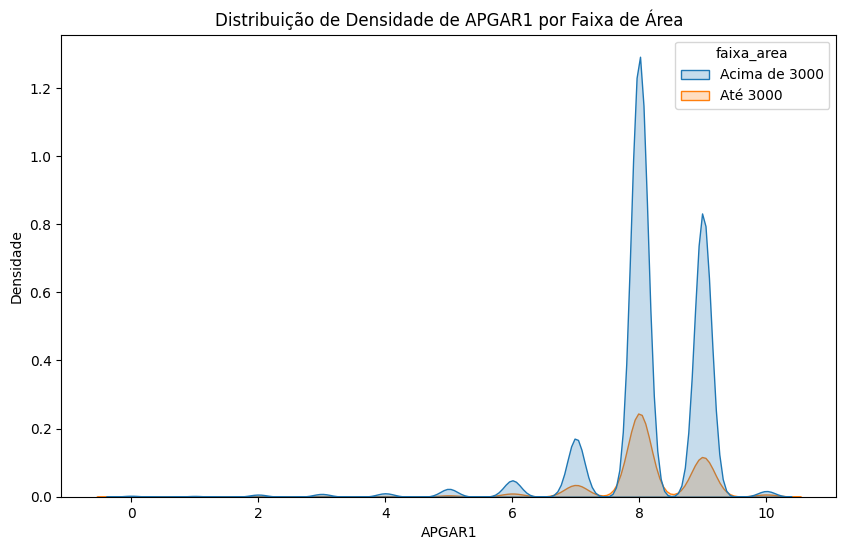

In [ ]:
if 'APGAR1' in sinasc_raw.columns and 'faixa_area' in sinasc_raw.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=sinasc_raw, x='APGAR1', hue='faixa_area', fill=True)
    plt.title('Distribuição de Densidade de APGAR1 por Faixa de Área')
    plt.xlabel('APGAR1')
    plt.ylabel('Densidade')
    plt.show()
else:
    print("Colunas 'APGAR1' ou 'faixa_area' não encontradas no DataFrame.")

In [ ]:
# Verifica se a coluna existe
if 'munResArea' in sinasc_raw.columns:
    # Cria as faixas: até 3000 e acima de 3000
    sinasc_raw['faixa_area'] = np.where(sinasc_raw['munResArea'] <= 3000, 'Até 3000', 'Acima de 3000')

    # Use 'APGAR1' e 'IDADEMAE' para as agregações
    variaveis_para_analise = [col for col in ['APGAR1', 'IDADEMAE'] if col in sinasc_raw.columns]

    # Verifica se há pelo menos duas
    if len(variaveis_para_analise) >= 2:
        # Aplica as agregações pedidas
        resumo_area = sinasc_raw.groupby('faixa_area')[variaveis_para_analise].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

        print("Análise por Faixas de Área do Município (munResArea)")
        print(f"Variáveis analisadas: {variaveis_para_analise}")
        display(resumo_area)
    else:
        print(f"Não há pelo menos duas das variáveis esperadas ({variaveis_para_analise}) para análise.")
else:
    print("A coluna 'munResArea' não foi encontrada na base.")

Análise por Faixas de Área do Município (munResArea)
Variáveis analisadas: ['APGAR1', 'IDADEMAE']


APGAR1                                                  \
                    sum      mean  min   max median       std       var   
faixa_area                                                                
Acima de 3000  177088.0  8.152847  0.0  10.0    8.0  0.978511  0.957484   
Até 3000        42070.0  8.073306  0.0  10.0    8.0  1.008790  1.017658   

              IDADEMAE                                                 
                   sum       mean min max median       std        var  
faixa_area                                                             
Acima de 3000   567872  26.038425  12  53   25.0  6.405365  41.028696  
Até 3000        137389  26.324775  11  53   26.0  6.305535  39.759775

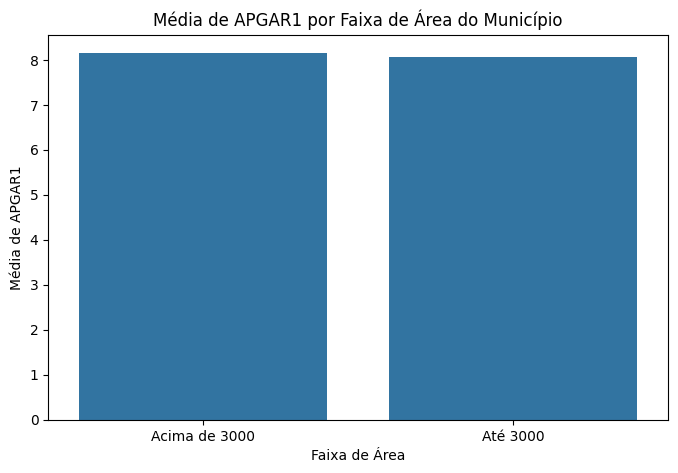

In [ ]:
# gráfico de barras para a média de APGAR1 por faixa de área
if 'faixa_area' in sinasc_raw.columns and ('APGAR1', 'mean') in resumo_area.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=resumo_area.index, y=resumo_area[('APGAR1', 'mean')])
    plt.title('Média de APGAR1 por Faixa de Área do Município')
    plt.xlabel('Faixa de Área')
    plt.ylabel('Média de APGAR1')
    plt.show()
else:
    print("Dados necessários para o gráfico de APGAR1 por faixa de área não encontrados.")

**Parte 3 — Faixas de altitude (munResAlt)**

**3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas**

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Verifica se a coluna existe
if 'munResAlt' in sinasc_raw.columns:

    # Criação de faixas de altitude — aqui usamos quartis (4 faixas)
    sinasc_raw['faixa_alt'] = pd.qcut(sinasc_raw['munResAlt'], q=4, duplicates='drop')

    # Escolhe duas variáveis numéricas ainda não utilizadas (exemplo: IDADEMAE e APGAR1)
    variaveis_numericas = [col for col in ['IDADEMAE', 'APGAR1', 'PESO', 'APGAR5'] if col in sinasc_raw.columns][:2]

    # Verifica se existem duas variáveis válidas
    if len(variaveis_numericas) >= 2:
        # Aplica as funções de agregação pedidas
        resumo_alt = sinasc_raw.groupby('faixa_alt')[variaveis_numericas].agg(
            ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
        )

        # print("=== Análise por Faixas de Altitude do Município (munResAlt) ===") # Removido
        # print(f"Variáveis analisadas: {variaveis_numericas}") # Removido
        display(resumo_alt)
    else:
        print("Não há duas variáveis numéricas adequadas para a análise.")
else:
    print(" A coluna 'munResAlt' não foi encontrada na base.")

IDADEMAE                                                 \
                    sum       mean min max median       std        var   
faixa_alt                                                                
(84.999, 87.0]   230507  26.271598  12  47   26.0  6.543106  42.812240   
(87.0, 153.0]    123266  25.426155  11  46   25.0  6.389296  40.823100   
(153.0, 191.0]   181314  26.133468  12  52   26.0  6.240142  38.939370   
(191.0, 595.0]   170150  26.310499  13  53   26.0  6.294953  39.626433   

                 APGAR1                                                  
                    sum      mean  min   max median       std       var  
faixa_alt                                                                
(84.999, 87.0]  72098.0  8.270965  0.0  10.0    8.0  0.936486  0.877006  
(87.0, 153.0]   39053.0  8.088857  0.0  10.0    8.0  1.127916  1.272194  
(153.0, 191.0]  55562.0  8.010669  0.0  10.0    8.0  0.935960  0.876022  
(191.0, 595.0]  52436.0  8.129612  0.0  10.0    8.0  0.963406  0.928151

**4 - Idade média ao longo do tempo por região imediata (Rondônia)**

**Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia**

In [ ]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

**5 - Mapear IDH, IFDM e PIB em faixas e agrupar 5 - Mapear IDH, IFDM e PIB em faixas e agrupar**

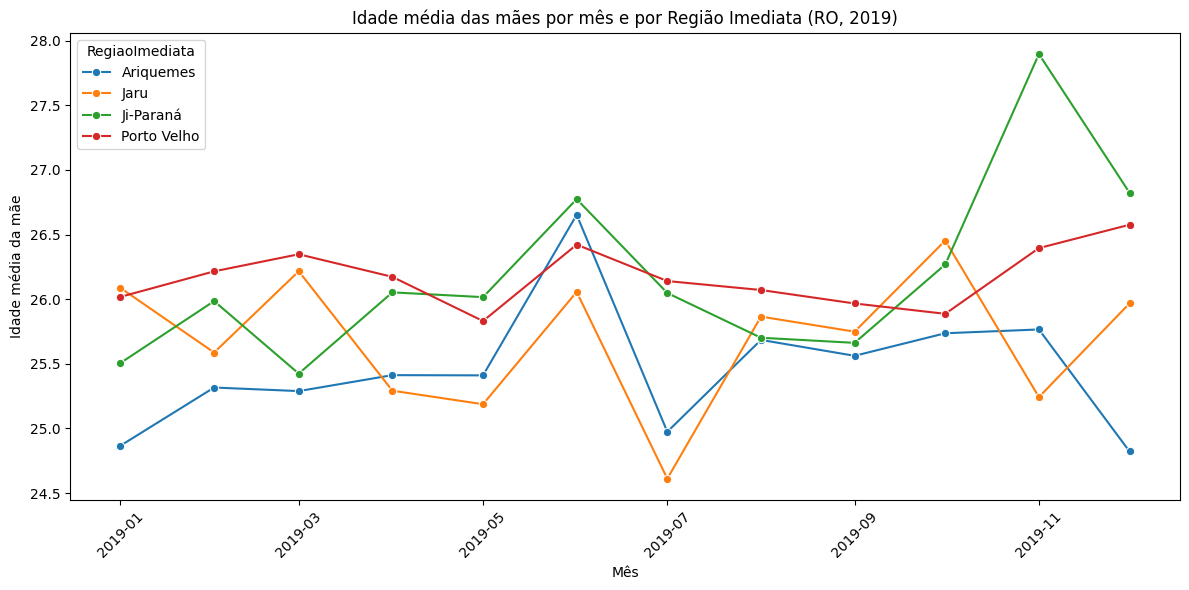

In [ ]:
# Encontrar coluna de município
if col_municipio is None:
    raise KeyError("Não encontrei coluna de município (ex.: 'munResNome'). Ajuste 'col_municipio' acima.")

# Normalizar nomes para casar com o dicionário (remove excesso de espaços e acentos simples)
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    # Opcional: corrigir alguns nomes com apóstrofo vs D'Oeste
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

sinasc_raw['Municipio_norm'] = sinasc_raw[col_municipio].map(normaliza_mun)
sinasc_raw['RegiaoImediata'] = sinasc_raw['Municipio_norm'].map(imediatas)

# Filtrar registros com idade da mãe e data válidas
col_idade = 'IDADEMAE' if 'IDADEMAE' in sinasc_raw.columns else None
if col_idade is None:
    raise KeyError("Coluna 'IDADEMAE' não encontrada na base. Ajuste a lista 'cand_num' se o nome for outro.")

# Agregar por mês e região imediata
sinasc_raw['ano_mes'] = sinasc_raw[col_data].dt.to_period('M').dt.to_timestamp()  # primeiro dia do mês
df_tempo = (
    sinasc_raw
    .dropna(subset=['RegiaoImediata', col_idade, 'ano_mes'])
    .groupby(['ano_mes', 'RegiaoImediata'])[col_idade]
    .mean()
    .reset_index(name='idade_media_mae')
)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='ano_mes', y='idade_media_mae', hue='RegiaoImediata', marker='o')
plt.title('Idade média das mães por mês e por Região Imediata (RO, 2019)')
plt.xlabel('Mês')
plt.ylabel('Idade média da mãe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

In [ ]:
# Função display compatível
try:
    _ = display
except NameError:
    def display(x):
        print(x)

In [ ]:
# Lista de agregações pedidas
agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

In [ ]:
# Identificar coluna de município no SINASC
col_municipio = None
for c in ['munResNome', 'MUNRES_NOME', 'MUN_NOME', 'munRes', 'Municipio']:
    if c in sinasc_raw.columns:
        col_municipio = c
        break

if col_municipio is None:
    raise KeyError("Não encontrei a coluna de município no SINASC (ex.: 'munResNome'). Ajuste a lista 'colunas possíveis'.")

In [ ]:
# Criar coluna normalizada de município no SINASC
sinasc_raw['Municipio_norm'] = sinasc_raw[col_municipio].map(normaliza_mun)

In [ ]:
# Escolher variáveis numéricas para agregar
candidatas = [c for c in ['IDADEMAE', 'PESO', 'APGAR1', 'APGAR5'] if c in sinasc_raw.columns]
if len(candidatas) < 1:
    raise ValueError("Não encontrei variáveis numéricas esperadas (ex.: IDADEMAE, PESO, APGAR1, APGAR5). Ajuste a lista 'candidatas'.")
# Use duas se houver; se só houver uma, usa só ela.
vars_agregar = candidatas[:2]
col_idade = 'IDADEMAE' if 'IDADEMAE' in sinasc_raw.columns else vars_agregar[0]

print(f" Variáveis numéricas usadas nas agregações: {vars_agregar}")

 Variáveis numéricas usadas nas agregações: ['IDADEMAE', 'PESO']


**IDH**

In [ ]:
# Função para normalizar nomes de municípios
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

# Garante que o DataFrame principal já tenha nomes normalizados
sinasc_raw['Municipio_norm'] = sinasc_raw['munResNome'].map(normaliza_mun)

# Lista de agregações
agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

# Variáveis numéricas para análise
vars_agregar = [c for c in ['IDADEMAE', 'PESO', 'APGAR1', 'APGAR5'] if c in sinasc_raw.columns][:2]

print(f" Variáveis numéricas usadas para agregação: {vars_agregar}\n")


 Variáveis numéricas usadas para agregação: ['IDADEMAE', 'PESO']



**IDH (Wikipedia)**

In [ ]:
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

# Garante que o DataFrame principal já tenha nomes normalizados
sinasc_raw['Municipio_norm'] = sinasc_raw['munResNome'].map(normaliza_mun)

In [208]:
import pandas as pd
import numpy as np
import tabula

# Função de limpeza simples de nomes de municípios
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

In [ ]:
import pandas as pd
import numpy as np

# Função para normalizar nomes de municípios
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

# Supondo que sinasc_raw já foi carregado e possui coluna de município
col_municipio = 'munResNome'  # ajuste se necessário
sinasc_raw['Municipio_norm'] = sinasc_raw[col_municipio].map(normaliza_mun)
# Variáveis numéricas para agregar
vars_agregar = [c for c in ['IDADEMAE', 'PESO', 'APGAR1', 'APGAR5'] if c in sinasc_raw.columns][:2]

agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

In [ ]:
# Função para normalizar nomes de municípios
def normaliza_mun(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = s.replace("d´Oeste", "D'Oeste").replace("d'Oeste", "D'Oeste")
    return s

In [ ]:
#função display
try:
    _ = display
except NameError:
    def display(x):
        print(x)

In [ ]:
# Caminhos dos arquivos PDF
pdf_idh = "/content/Lista_de_municípios_de_Rondônia_por_IDH-M.pdf"
pdf_ifdm = "/content/Lista_de_municípios_de_Rondônia_por_IFDM.pdf"
pdf_pib = "/content/Lista_de_municípios_de_Rondônia_por_PIB.pdf"

In [ ]:
# Variáveis de agregação
agg_funcs = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
vars_agregar = [c for c in ['IDADEMAE', 'PESO', 'APGAR1', 'APGAR5'] if c in sinasc_raw.columns][:2]

In [ ]:
import tabula

In [ ]:
print(" Lendo tabela de IDH a partir do PDF")
idh_tables = tabula.read_pdf(pdf_idh, pages="all", lattice=True)
idh = pd.concat(idh_tables, ignore_index=True)

 Lendo tabela de IDH a partir do PDF


In [ ]:
# Detecta colunas e renomeia
# Removendo linhas de cabeçalho extras e selecionando a coluna correta
print("Tabela IDH extraída (primeiras linhas):")
display(idh.head()) # Mostra o DataFrame logo após a leitura do PDF para inspeção

# Assumindo que a linha com 'IDH longevidade' é um cabeçalho extra ou lixo
# Vamos tentar filtrar linhas onde a primeira coluna (ou a coluna que deveria ser o município)
# NÃO começa com um número (já que municípios não começam com números, mas valores de ranking/IDH podem)
# Ou, mais genericamente, remover linhas que contêm 'IDH longevidade' na coluna que renomeamos para 'IDH'

# Antes de renomear e converter, identificar a coluna de IDH pelo seu conteúdo ou posição original
# Tentativa de identificar colunas pelo conteúdo típico 'Município' e 'IDH-M' ou posição
col_municipio_raw = None
col_idh_raw = None

# Procura por cabeçalhos comuns ou tenta posições esperadas (ajuste conforme a inspeção de idh.head())
for col_name in idh.columns:
    if 'Município' in str(col_name) or 'Nome do(a) município(a)' in str(col_name):
        col_municipio_raw = col_name
    if 'IDH-M' in str(col_name):
         col_idh_raw = col_name

# Se não encontrou pelo nome, tenta por posição (ajuste se a estrutura do PDF for diferente)
if col_municipio_raw is None:
     # Tentativa baseada em tabelas comuns da Wikipedia: Município na 1ª ou 2ª coluna (index 0 ou 1)
     if len(idh.columns) > 0:
         col_municipio_raw = idh.columns[0]
     if col_municipio_raw is None and len(idh.columns) > 1:
         col_municipio_raw = idh.columns[1]


if col_idh_raw is None:
    # Tentativa baseada em tabelas comuns da Wikipedia: IDH na 2ª ou 3ª coluna (index 1 ou 2)
    if len(idh.columns) > 1:
        col_idh_raw = idh.columns[1]
    if col_idh_raw is None and len(idh.columns) > 2:
        col_idh_raw = idh.columns[2]


if col_municipio_raw is not None and col_idh_raw is not None:
    # Seleciona apenas as colunas que parecem ser Município e IDH
    idh_clean = idh[[col_municipio_raw, col_idh_raw]].copy()

    # Renomeia para nomes padrão
    idh_clean.columns = ['Municipio', 'IDH']

    # Remove linhas de cabeçalhos extras ou lixo - Tenta remover linhas onde a coluna 'IDH' contém strings específicas
    # Adiciona 'IDH longevidade' na lista de strings a remover
    strings_a_remover = ['IDH longevidade', 'IDH Renda', 'IDH Educação', 'IDH Longevidade', 'IDH', 'Ranking', 'Posição']
    # Converte a coluna 'IDH' para string para facilitar a comparação
    idh_clean['IDH_str'] = idh_clean['IDH'].astype(str)
    # Filtra linhas onde a coluna 'IDH_str' NÃO está na lista de strings a remover
    idh_clean = idh_clean[~idh_clean['IDH_str'].isin(strings_a_remover)].copy()

    # Remove a coluna auxiliar de string
    idh_clean = idh_clean.drop(columns=['IDH_str'])

    # Remove linhas onde 'Municipio' é nulo ou parece ser um cabeçalho geral
    idh_clean = idh_clean.dropna(subset=['Municipio'])
    idh_clean = idh_clean[idh_clean['Municipio'].astype(str).str.strip() != ''].copy()


    # Converte IDH para numérico, tratando vírgulas como decimais e erros
    # O erro 'IDH longevidade' deve ter sido removido nas etapas anteriores
    # Usando pd.to_numeric para conversão robusta com errors='coerce'
    idh_clean['IDH'] = pd.to_numeric(idh_clean['IDH'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

    # Remove linhas onde a conversão para float resultou em NaN (erros)
    idh_clean = idh_clean.dropna(subset=['IDH']).copy()


    # Continuar com o processamento com idh_clean
    idh = idh_clean # Substitui o DataFrame original pelo limpo

    # Normaliza para casar municípios
    idh['Municipio_norm'] = idh['Municipio'].map(normaliza_mun)
    # Filtra apenas municípios com IDH numérico e nome normalizado válido
    idh = idh[idh['IDH'].notna() & idh['Municipio_norm'].notna() & (idh['Municipio_norm'] != '')].copy()


    # Faixas clássicas de IDH-M (ajuste se sua fonte usar cortes diferentes):
    # Muito Alto (>=0.800), Alto (0.700–0.799), Médio (0.600–0.699), Baixo (<0.600)
    bins_idh = [-np.inf, 0.600, 0.700, 0.800, np.inf]
    labels_idh = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
    # Usando pd.cut no DataFrame já limpo
    idh['Faixa_IDH'] = pd.cut(idh['IDH'], bins=bins_idh, labels=labels_idh)

    # ... o restante do código de merge e agregação para IDH ...

    # Junta ao SINASC por município
    # Certifique-se que sinasc_raw e idh_clean (agora idh) têm a coluna 'Municipio_norm'
    if 'Municipio_norm' in sinasc_raw.columns and 'Municipio_norm' in idh.columns:
        base_idh = sinasc_raw.merge(idh[['Municipio_norm','Faixa_IDH']], on='Municipio_norm', how='left')

        # Determine as variáveis numéricas para agregação
        # Certifique-se que col_idade e 'PESO' (se usado) existem em base_idh
        variaveis_para_agregar_idh = [col for col in ['IDADEMAE', 'PESO'] if col in base_idh.columns]
        if not variaveis_para_agregar_idh:
             variaveis_para_agregar_idh = [col_idade] # Use col_idade como fallback se PESO não existir
             if col_idade not in base_idh.columns:
                 print(f" Variável de fallback '{col_idade}' não encontrada em base_idh.")
                 variaveis_para_agregar_idh = [] # Nenhuma variável para agregar

        if variaveis_para_agregar_idh:
            # Observe=False é usado aqui para incluir categorias mesmo que vazias
            # Em futuras versões do pandas, observed=True será o padrão.
            # Para manter o comportamento atual (mostrar todas as faixas), mantemos observed=False
            # Se quiser ver apenas as faixas com dados, remova observed=False
            agr_idh = base_idh.groupby('Faixa_IDH', observed=False)[variaveis_para_agregar_idh].agg(agg_funcs)
            print("\n=== Agregações por Faixa de IDH ===")
            display(agr_idh)
        else:
            print("\n Não foi possível encontrar variáveis numéricas adequadas para agregação por IDH.")

    else:
        print("\n Coluna 'Municipio_norm' não encontrada em sinasc_raw ou idh para merge por IDH.")

else:
    print("\n Não foi possível identificar as colunas de Município ou IDH na tabela extraída.")

Tabela IDH extraída (primeiras linhas):


,Municipio,IDH
14,IDH renda,IDH longevidade
18,0.764,0.819



=== Agregações por Faixa de IDH ===


IDADEMAE                             PESO                          \
                sum mean min max median std var  sum mean min max median std   
Faixa_IDH                                                                      
Baixo             0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   
Médio             0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   
Alto              0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   
Muito Alto        0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   

                
           var  
Faixa_IDH       
Baixo      NaN  
Médio      NaN  
Alto       NaN  
Muito Alto NaN

In [ ]:
# Cria faixas de IDH
bins_idh = [-np.inf, 0.600, 0.700, 0.800, np.inf]
labels_idh = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
idh['Faixa_IDH'] = pd.cut(idh['IDH'], bins=bins_idh, labels=labels_idh)

In [ ]:
# Junta ao SINASC
sinasc_raw['Municipio_norm'] = sinasc_raw['munResNome'].map(normaliza_mun)
base_idh = sinasc_raw.merge(idh[['Municipio_norm','Faixa_IDH']], on='Municipio_norm', how='left')

In [ ]:
agr_idh = base_idh.groupby('Faixa_IDH')[vars_agregar].agg(agg_funcs)
print("\n=== Agrupamento por Faixa de IDH ===")
display(agr_idh)


=== Agrupamento por Faixa de IDH ===


IDADEMAE                             PESO                          \
                sum mean min max median std var  sum mean min max median std   
Faixa_IDH                                                                      
Baixo             0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   
Médio             0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   
Alto              0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   
Muito Alto        0  NaN NaN NaN    NaN NaN NaN    0  NaN NaN NaN    NaN NaN   

                
           var  
Faixa_IDH       
Baixo      NaN  
Médio      NaN  
Alto       NaN  
Muito Alto NaN

**IFDM**

In [ ]:
# 5.B — IFDM (a partir de PDF)
try:
    print("Lendo tabela de IFDM a partir do PDF...")
    pdf_ifdm = '/content/Lista_de_municípios_de_Rondônia_por_IFDM.pdf' # Caminho do seu arquivo PDF de IFDM

    # Verifica se o arquivo PDF existe
    import os
    if not os.path.exists(pdf_ifdm):
        print(f"Arquivo PDF não encontrado: {pdf_ifdm}. Certifique-se de que o nome e o caminho estão corretos.")
    else:
        # Ler tabelas do PDF
        # Lattice=True tenta usar as linhas e colunas detectadas para extrair tabelas
        # Ajuste o 'pages' se souber exatamente em quais páginas as tabelas estão
        ifdm_tables = tabula.read_pdf(pdf_ifdm, pages="all", lattice=True)

        print(f"Leitura do PDF concluída. {len(ifdm_tables)} tabela(s) encontrada(s).")

        # --- Exibir estrutura das tabelas extraídas para inspeção ---
        print("\nEstrutura das tabelas extraídas:")
        if not ifdm_tables:
            print(" Nenhuma tabela extraída por tabula.")
        else:
            for i, table in enumerate(ifdm_tables):
                print(f"--- Tabela {i+1} ---")
                display(table.head()) # Mostra as primeiras linhas de cada tabela
                print("-" * 20)

        # Concatena todas as tabelas encontradas em um único DataFrame
        if ifdm_tables:
            ifdm = pd.concat(ifdm_tables, ignore_index=True)
            print("\n Tabelas concatenadas no DataFrame 'ifdm'.")
            print("\nDataFrame 'ifdm' completo (primeiras linhas):")
            display(ifdm.head())
            print("\nInformações do DataFrame 'ifdm':")
            display(ifdm.info())

        else:
             ifdm = None # Garante que ifdm seja None se nenhuma tabela for encontrada
             print("\n Nenhuma tabela foi concatenada em 'ifdm'.")


except FileNotFoundError:
    print(f"\n Arquivo PDF não encontrado no caminho: {pdf_ifdm}. Certifique-se de que o nome e o caminho estão corretos.")
except Exception as e:
    print(f"\n Erro ao ler ou processar o PDF de IFDM: {e}")
    ifdm = None # Garante que ifdm seja None em caso de erro

📗 Lendo tabela de IFDM a partir do PDF...
Leitura do PDF concluída. 9 tabela(s) encontrada(s).

Estrutura das tabelas extraídas:
--- Tabela 1 ---


,Unnamed: 0


--------------------
--- Tabela 2 ---


,Unnamed: 0


--------------------
--- Tabela 3 ---


,Unnamed: 0


--------------------
--- Tabela 4 ---


,Unnamed: 0


--------------------
--- Tabela 5 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Mapa dos municípios de Rondônia por IFDM em 20...,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


--------------------
--- Tabela 6 ---


,Mapa dos municípios de Rondônia por IFDM em 2013.\rLegenda:\rAlto (nenhum município)\rModerado (26 municípios)\rRegular (26 municípios)\rBaixo (nenhum município)\rSem dados (nenhum município)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


--------------------
--- Tabela 7 ---


,Posição,Município,IFDM\rConsolidado\r(2013)
0,Desenvolvimento alto,NaN,NaN
1,nenhum município,NaN,NaN
2,Desenvolvimento moderado,NaN,NaN
3,1o,Ariquemes,0.7746
4,2o,Vilhena,0.7465


--------------------
--- Tabela 8 ---


,11o,Pimenteiras do Oeste,0.6501
0,12o,Teixeirópolis,0.6500
1,13o,Colorado do Oeste,0.6473
2,14o,Jaru,0.6450
3,15o,Rio Crespo,0.6430
4,16o,Primavera de Rondônia,0.6384


--------------------
--- Tabela 9 ---


,47o,Machadinho d'Oeste,0.5322
0,48o,Campo Novo de Rondônia,0.5272
1,49o,Nova Mamoré,0.5084
2,50o,Cujubim,0.5055
3,51o,Alto Alegre dos Parecis,0.5046
4,52o,Governador Jorge Teixeira,0.4562


--------------------

 Tabelas concatenadas no DataFrame 'ifdm'.

DataFrame 'ifdm' completo (primeiras linhas):


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Mapa dos municípios de Rondônia por IFDM em 2013.\rLegenda:\rAlto (nenhum município)\rModerado (26 municípios)\rRegular (26 municípios)\rBaixo (nenhum município)\rSem dados (nenhum município),Posição,Município,IFDM\rConsolidado\r(2013),11o,Pimenteiras do Oeste,0.6501,47o,Machadinho d'Oeste,0.5322
0,Mapa dos municípios de Rondônia por IFDM em 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informações do DataFrame 'ifdm':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 13 columns):
 #   Column                                                                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                                                                                 1 non-null      object 
 1   Unnamed: 1                                                                                                                                                                                 0 non-null      float64

None

In [206]:
# Certifique-se de que a célula QW66amgS-Sl_ (que lê o PDF de IFDM) foi executada antes desta.

# Exibir colunas extraídas para inspeção
print("Colunas extraídas do PDF de IFDM:")
if 'ifdm' in locals() and ifdm is not None: # Verifica se ifdm foi criado
    print(ifdm.columns)

    # Limpa nomes de colunas (remove espaços em branco extras)
    ifdm.columns = [c.strip() for c in ifdm.columns]

    # Tenta identificar as colunas corretas por palavras-chave em vez de índice
    col_municipio = None
    col_ifdm_valor = None

    for col in ifdm.columns:
        col_lower = str(col).lower()
        if 'município' in col_lower:
            col_municipio = col
        if 'ifdm' in col_lower and col_lower != 'ranking ifdm': # Exclui 'Ranking IFDM' se houver
            col_ifdm_valor = col

    # Se as colunas foram identificadas
    if col_municipio is not None and col_ifdm_valor is not None:
        # Seleciona e renomeia as colunas relevantes
        ifdm = ifdm[[col_municipio, col_ifdm_valor]].copy()
        ifdm.columns = ['Municipio', 'IFDM']

        # Converte IFDM para numérico, tratando vírgulas como decimais e erros
        # Usando pd.to_numeric para conversão robusta com errors='coerce'
        ifdm['IFDM'] = pd.to_numeric(ifdm['IFDM'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

        # Remove linhas com valores faltantes em Município ou IFDM
        ifdm = ifdm[['Municipio', 'IFDM']].dropna().copy()


        # Normaliza nome dos municípios
        ifdm['Municipio_norm'] = ifdm['Municipio'].map(normaliza_mun)

        # Remove linhas onde a normalização resultou em NaN
        ifdm = ifdm.dropna(subset=['Municipio_norm']).copy()


        print("\nDataFrame IFDM processado (primeiras linhas):")
        display(ifdm.head())

        # --- Continuar com o merge e agregação para IFDM ---
        # Assumindo que sinasc_raw e ifdm têm a coluna 'Municipio_norm'
        if 'Municipio_norm' in sinasc_raw.columns and 'Municipio_norm' in ifdm.columns:
            # Faixas sugeridas IFDM (0–1): Muito baixo [0–0.4), Regular [0.4–0.6), Moderado [0.6–0.8), Alto [0.8–1]
            bins_ifdm = [0, 0.4, 0.6, 0.8, 1.0000001]
            labels_ifdm = ['Muito baixo', 'Regular', 'Moderado', 'Alto']
            # Usando pd.cut no DataFrame IFDM já limpo
            ifdm['Faixa_IFDM'] = pd.cut(ifdm['IFDM'], bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)

            # Agora merge base_ifdm novamente para incluir a coluna Faixa_IFDM
            # Ou, melhor, fazer o merge APÓS criar a Faixa_IFDM no dataframe 'ifdm'
            base_ifdm = sinasc_raw.merge(ifdm[['Municipio_norm','Faixa_IFDM']], on='Municipio_norm', how='left')


            # Determine as variáveis numéricas para agregação
            # Certifique-se que col_idade e 'PESO' (se usado) existem em base_ifdm
            variaveis_para_agregar_ifdm = [col for col in ['IDADEMAE', 'PESO'] if col in base_ifdm.columns]
            if not variaveis_para_agregar_ifdm:
                 variaveis_para_agregar_ifdm = [col_idade] # Use col_idade como fallback se PESO não existir
                 if col_idade not in base_ifdm.columns:
                     print(f"Variável de fallback '{col_idade}' não encontrada em base_ifdm.")
                     variaveis_para_agregar_ifdm = [] # Nenhuma variável para agregar

            if variaveis_para_agregar_ifdm:
                # Observe=False é usado aqui para incluir categorias mesmo que vazias
                # Em futuras versões do pandas, observed=True será o padrão.
                # Para manter o comportamento atual (mostrar todas as faixas), mantemos observed=False
                # Se quiser ver apenas as faixas com dados, remova observed=False
                agr_ifdm = base_ifdm.groupby('Faixa_IFDM', observed=False)[variaveis_para_agregar_ifdm].agg(agg_funcs)
                print("\n=== Agregações por Faixa de IFDM ===")
                display(agr_ifdm)
            else:
                print("\n Não foi possível encontrar variáveis numéricas adequadas para agregação por IFDM.")

        else:
            print("\n Coluna 'Municipio_norm' não encontrada em sinasc_raw ou ifdm para merge por IFDM.")


    else:
        print("\n Não foi possível identificar as colunas de Município ou IFDM na tabela extraída. Verifique a estrutura da tabela no PDF.")
        if 'ifdm' in locals() and ifdm is not None:
            print("Colunas encontradas:", ifdm.columns.tolist())

else:
    print("\n DataFrame 'ifdm' não foi criado. Certifique-se de executar a célula anterior (QW66amgS-Sl_).")

Colunas extraídas do PDF de IFDM:
Index(['Municipio', 'IFDM', 'Municipio_norm', 'Faixa_IFDM'], dtype='object')

 Não foi possível identificar as colunas de Município ou IFDM na tabela extraída. Verifique a estrutura da tabela no PDF.
Colunas encontradas: ['Municipio', 'IFDM', 'Municipio_norm', 'Faixa_IFDM']


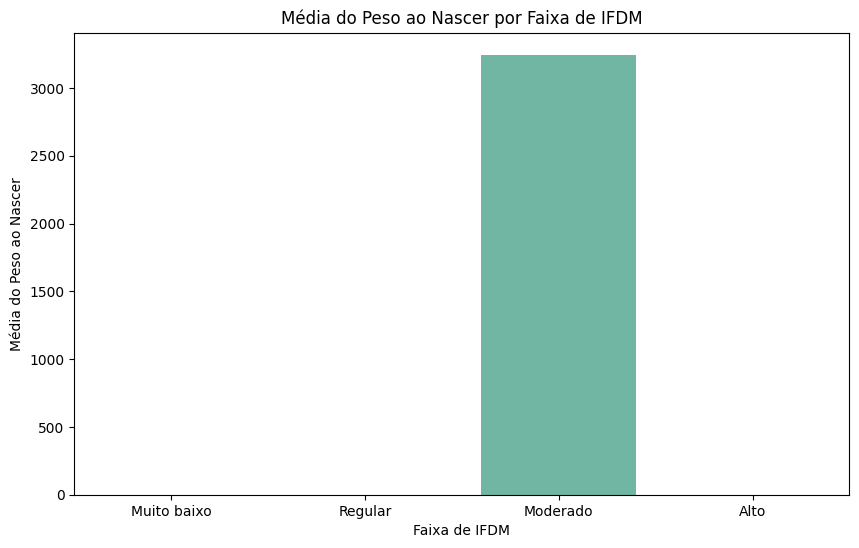

In [198]:
# Visualizar a média de PESO por Faixa de IFDM
if 'Faixa_IFDM' in base_ifdm.columns and ('PESO', 'mean') in agr_ifdm.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=agr_ifdm.index, y=agr_ifdm[('PESO', 'mean')], palette='viridis', alpha=0.7)
    plt.title('Média do Peso ao Nascer por Faixa de IFDM')
    plt.xlabel('Faixa de IFDM')
    plt.ylabel('Média do Peso ao Nascer')
    plt.show()
else:
    print("Dados necessários para o gráfico de Peso por Faixa de IFDM não encontrados.")

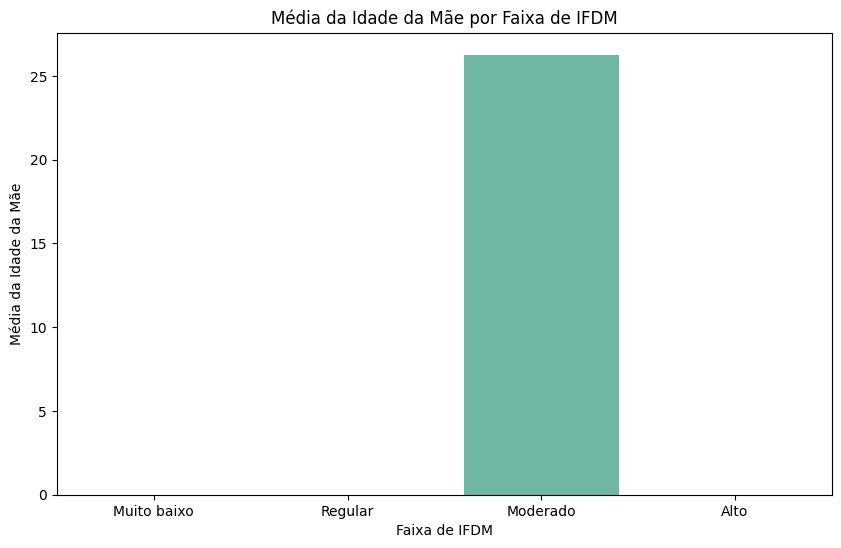

In [199]:
# Visualizar a média de IDADEMAE por Faixa de IFDM
if 'Faixa_IFDM' in base_ifdm.columns and ('IDADEMAE', 'mean') in agr_ifdm.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=agr_ifdm.index, y=agr_ifdm[('IDADEMAE', 'mean')], palette='viridis', alpha=0.7)
    plt.title('Média da Idade da Mãe por Faixa de IFDM')
    plt.xlabel('Faixa de IFDM')
    plt.ylabel('Média da Idade da Mãe')
    plt.show()
else:
    print("Dados necessários para o gráfico de Idade da Mãe por Faixa de IFDM não encontrados.")

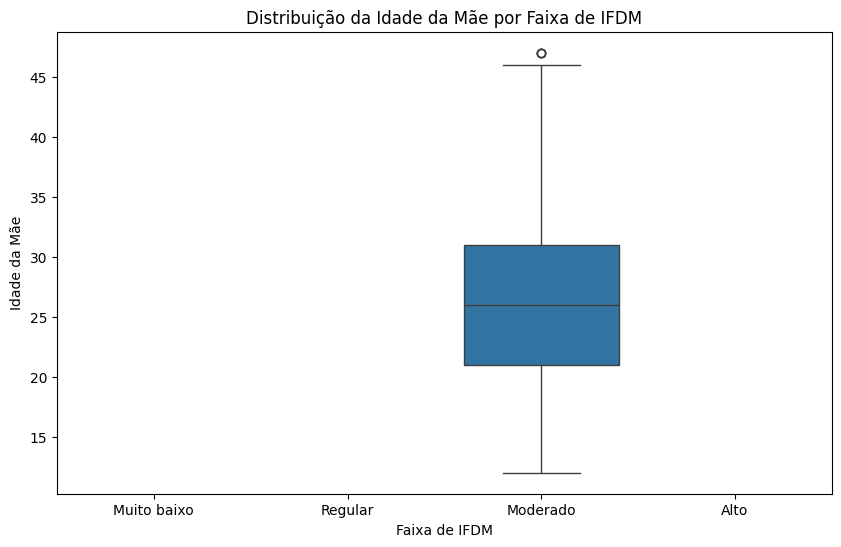

In [214]:
if 'Faixa_IFDM' in base_ifdm.columns and 'IDADEMAE' in base_ifdm.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=base_ifdm, x='Faixa_IFDM', y='IDADEMAE')
    plt.title('Distribuição da Idade da Mãe por Faixa de IFDM')
    plt.xlabel('Faixa de IFDM')
    plt.ylabel('Idade da Mãe')
    plt.show()
else:
    print("Colunas 'Faixa_IFDM' ou 'IDADEMAE' não encontradas em base_ifdm.")

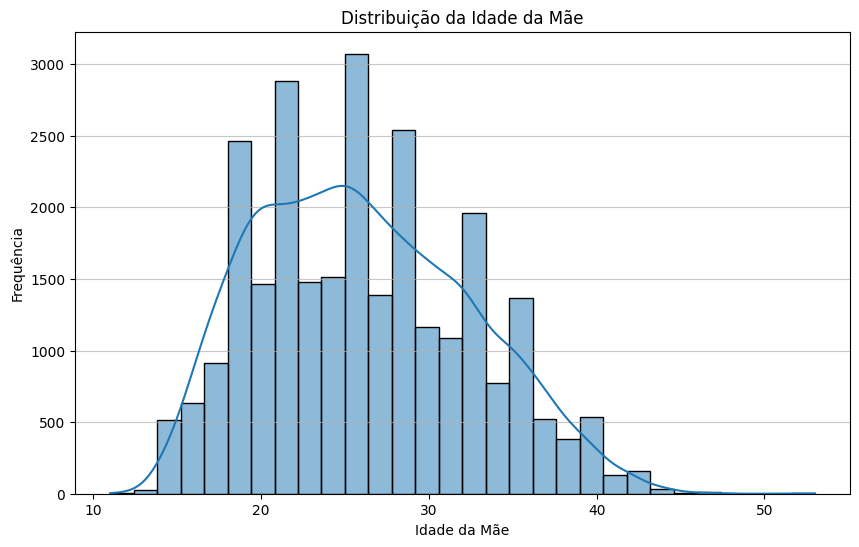

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sinasc_raw, x='IDADEMAE', kde=True, bins=30)
plt.title('Distribuição da Idade da Mãe')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.7)
plt.show()

In [ ]:
ifdm.columns = [c.strip() for c in ifdm.columns]
ifdm = ifdm.rename(columns={ifdm.columns[0]: "Municipio", ifdm.columns[1]: "IFDM"})
ifdm = ifdm[['Municipio', 'IFDM']].dropna()
ifdm['IFDM'] = ifdm['IFDM'].astype(str).str.replace(',', '.').astype(float)
ifdm['Municipio_norm'] = ifdm['Municipio'].map(normaliza_mun)

bins_ifdm = [0, 0.4, 0.6, 0.8, 1.0000001]
labels_ifdm = ['Muito baixo', 'Regular', 'Moderado', 'Alto']
ifdm['Faixa_IFDM'] = pd.cut(ifdm['IFDM'], bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)

base_ifdm = sinasc_raw.merge(ifdm[['Municipio_norm','Faixa_IFDM']], on='Municipio_norm', how='left')
agr_ifdm = base_ifdm.groupby('Faixa_IFDM')[vars_agregar].agg(agg_funcs)
print("\n=== Agrupamento por Faixa de IFDM ===")
display(agr_ifdm)



=== Agrupamento por Faixa de IFDM ===


IDADEMAE                                                     \
                 sum       mean   min   max median       std        var   
Faixa_IFDM                                                                
Muito baixo        0        NaN   NaN   NaN    NaN       NaN        NaN   
Regular            0        NaN   NaN   NaN    NaN       NaN        NaN   
Moderado      458797  26.263495  12.0  47.0   26.0  6.402758  40.995313   
Alto               0        NaN   NaN   NaN    NaN       NaN        NaN   

                 PESO                                                  \
                  sum         mean    min     max  median         std   
Faixa_IFDM                                                              
Muito baixo         0          NaN    NaN     NaN     NaN         NaN   
Regular             0          NaN    NaN     NaN     NaN         NaN   
Moderado     56682388  3244.741428  292.0  5720.0  3275.0  550.698565   
Alto                0          NaN    NaN     NaN     NaN         NaN   

                            
                       var  
Faixa_IFDM                  
Muito baixo            NaN  
Regular                NaN  
Moderado     303268.909264  
Alto                   NaN

**PIB**

In [195]:
# 5.C — PIB (a partir de PDF)
try:
    print(" Lendo tabela de PIB a partir do PDF...")
    pdf_pib = '/content/Lista_de_municípios_de_Rondônia_por_PIB.pdf' # Caminho do seu arquivo PDF de PIB

    # Verifica se o arquivo PDF existe
    import os
    if not os.path.exists(pdf_pib):
        raise FileNotFoundError(f"Arquivo PDF não encontrado: {pdf_pib}")

    # Ler tabelas do PDF
    # Lattice=True tenta usar as linhas e colunas detectadas para extrair tabelas
    # Ajuste o 'pages' se souber exatamente em quais páginas as tabelas estão
    pib_tables = tabula.read_pdf(pdf_pib, pages="all", lattice=True)

    print(f" Leitura do PDF concluída. {len(pib_tables)} tabela(s) encontrada(s).")

    # --- Exibir estrutura das tabelas extraídas para inspeção ---
    print("\nEstrutura das tabelas extraídas:")
    if not pib_tables:
        print(" Nenhuma tabela extraída por tabula.")
    else:
        for i, table in enumerate(pib_tables):
            print(f"--- Tabela {i+1} ---")
            display(table.head()) # Mostra as primeiras linhas de cada tabela
            print("-" * 20)

    # Concatena todas as tabelas encontradas em um único DataFrame
    if pib_tables:
        pib = pd.concat(pib_tables, ignore_index=True)
        print("\n Tabelas concatenadas no DataFrame 'pib'.")
        print("\nDataFrame 'pib' completo (primeiras linhas):")
        display(pib.head())
        print("\nInformações do DataFrame 'pib':")
        display(pib.info())

    else:
         pib = None # Garante que pib seja None se nenhuma tabela for encontrada
         print("\n Nenhuma tabela foi concatenada em 'pib'.")


except FileNotFoundError:
    print(f"\n Arquivo PDF não encontrado no caminho: {pdf_pib}.")
    print(" Por favor, verifique no painel de arquivos do Colab (ícone de pasta à esquerda) se o arquivo está carregado em /content/ com o nome EXATO 'Lista_de_municípios_de_Rondônia_por_PIB.pdf'.")
    print("Se o nome ou local for diferente, edite esta célula e corrija o caminho.")

except Exception as e:
    print(f"\n Erro ao ler ou processar o PDF de PIB: {e}")
    pib = None # Garante que pib seja None em caso de erro

 Lendo tabela de PIB a partir do PDF...
 Leitura do PDF concluída. 11 tabela(s) encontrada(s).

Estrutura das tabelas extraídas:
--- Tabela 1 ---


,Posição,Município,PIB,Variação,Unnamed: 0
0,Em 2021,Mudança\r(2020),NaN,NaN,NaN
1,1,(0),Porto\rVelho,20.059.522,NaN
2,2,(0),Ji-Paraná,4.231.113,NaN
3,NaN,NaN,NaN,NaN,NaN
4,3,(0),Vilhena,4.215.046,NaN


--------------------
--- Tabela 2 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Porto Velho possui o maior PIB de\rRondônia e ...,NaN,NaN


--------------------
--- Tabela 3 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,"Ji-Paraná, na região central de\rRondônia, pos...",NaN,NaN


--------------------
--- Tabela 4 ---


,Nova\rMamoré
0,NaN


--------------------
--- Tabela 5 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Vilhena possui o 3o maior PIB de\rRondônia.,NaN,NaN


--------------------
--- Tabela 6 ---


,20,(1),Nova\rBrasilândia\rdo Oeste,548.734,Unnamed: 0
0,NaN,NaN,NaN,NaN,NaN
1,21.0,(2),Alto\rParaíso,510.361,NaN
2,22.0,(0),São\rFrancisco do\rGuaporé,488.043,NaN
3,23.0,(3),Cujubim,487.480,NaN
4,NaN,NaN,NaN,NaN,NaN


--------------------
--- Tabela 7 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,A cidade de Cacoal sustenta a 5a\rcolocação.,NaN,NaN


--------------------
--- Tabela 8 ---


,Unnamed: 0,Unnamed: 1
0,Guajará-Mirim possui o 9o maior PIB de\rRondônia.,NaN


--------------------
--- Tabela 9 ---


,Mirante\rda Serra
0,NaN


--------------------
--- Tabela 10 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Espigão do Oeste sustenta a 14a\rposição.,NaN,NaN


--------------------
--- Tabela 11 ---


,42,Unnamed: 0,(2),Vale do Anari,220.588,Unnamed: 1
0,43.0,NaN,(1),Santa Luzia do Oeste,213.556,NaN
1,44.0,NaN,(6),Itapuã do Oeste,210.031,NaN
2,45.0,NaN,(2),Vale do Paraíso,185.648,NaN
3,46.0,NaN,(0),Rio Crespo,184.430,NaN
4,47.0,NaN,(0),Nova União,157.321,NaN


--------------------

 Tabelas concatenadas no DataFrame 'pib'.

DataFrame 'pib' completo (primeiras linhas):


,Posição,Município,PIB,Variação,Unnamed: 0,Unnamed: 1,Unnamed: 2,Nova\rMamoré,20,(1),Nova\rBrasilândia\rdo Oeste,548.734,Mirante\rda Serra,42,(2),Vale do Anari,220.588
0,Em 2021,Mudança\r(2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(0),Porto\rVelho,20.059.522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(0),Ji-Paraná,4.231.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,(0),Vilhena,4.215.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informações do DataFrame 'pib':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Posição                    20 non-null     object 
 1   Município                  20 non-null     object 
 2   PIB                        19 non-null     object 
 3   Variação                   19 non-null     object 
 4   Unnamed: 0                 6 non-null      object 
 5   Unnamed: 1                 0 non-null      float64
 6   Unnamed: 2                 0 non-null      float64
Mamoré                0 non-null      float64
 8   20                         21 non-null     float64
 9   (1)                        21 non-null     object 
do Oeste  21 non-null     object 
 11  548.734                    21 non-null     float64
da Serra           0 non-null      float64
 13  42                         10 non-null     float64
 14  (2)     

None

In [196]:
# 5.C — PIB (a partir de PDF)
try:
    print(" Lendo tabela de PIB a partir do PDF...")
    pdf_pib = '/content/Lista_de_municípios_de_Rondônia_por_PIB.pdf' # Caminho do seu arquivo PDF de PIB

    # Verifica se o arquivo PDF existe
    import os
    if not os.path.exists(pdf_pib):
        raise FileNotFoundError(f"Arquivo PDF não encontrado: {pdf_pib}")

    # Ler tabelas do PDF
    # Lattice=True tenta usar as linhas e colunas detectadas para extrair tabelas
    # Ajuste o 'pages' se souber exatamente em quais páginas as tabelas estão
    pib_tables = tabula.read_pdf(pdf_pib, pages="all", lattice=True)

    print(f"Leitura do PDF concluída. {len(pib_tables)} tabela(s) encontrada(s).")

    # --- Exibir estrutura das tabelas extraídas para inspeção ---
    print("\nEstrutura das tabelas extraídas:")
    if not pib_tables:
        print(" Nenhuma tabela extraída por tabula.")
    else:
        for i, table in enumerate(pib_tables):
            print(f"--- Tabela {i+1} ---")
            display(table.head()) # Mostra as primeiras linhas de cada tabela
            print("-" * 20)

    # Concatena todas as tabelas encontradas em um único DataFrame
    if pib_tables:
        pib = pd.concat(pib_tables, ignore_index=True)
        print("\n Tabelas concatenadas no DataFrame 'pib'.")
        print("\nDataFrame 'pib' completo (primeiras linhas):")
        display(pib.head())
        print("\nInformações do DataFrame 'pib':")
        display(pib.info())

    else:
         pib = None # Garante que pib seja None se nenhuma tabela for encontrada
         print("\n Nenhuma tabela foi concatenada em 'pib'.")


except FileNotFoundError:
    print(f"\n Arquivo PDF não encontrado no caminho: {pdf_pib}.")
    print(" Por favor, verifique no painel de arquivos do Colab (ícone de pasta à esquerda) se o arquivo está carregado em /content/ com o nome EXATO 'Lista_de_municípios_de_Rondônia_por_PIB.pdf'.")
    print("Se o nome ou local for diferente, edite esta célula e corrija o caminho.")

except Exception as e:
    print(f"\n Erro ao ler ou processar o PDF de PIB: {e}")
    pib = None # Garante que pib seja None em caso de erro

 Lendo tabela de PIB a partir do PDF...
Leitura do PDF concluída. 11 tabela(s) encontrada(s).

Estrutura das tabelas extraídas:
--- Tabela 1 ---


,Posição,Município,PIB,Variação,Unnamed: 0
0,Em 2021,Mudança\r(2020),NaN,NaN,NaN
1,1,(0),Porto\rVelho,20.059.522,NaN
2,2,(0),Ji-Paraná,4.231.113,NaN
3,NaN,NaN,NaN,NaN,NaN
4,3,(0),Vilhena,4.215.046,NaN


--------------------
--- Tabela 2 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Porto Velho possui o maior PIB de\rRondônia e ...,NaN,NaN


--------------------
--- Tabela 3 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,"Ji-Paraná, na região central de\rRondônia, pos...",NaN,NaN


--------------------
--- Tabela 4 ---


,Nova\rMamoré
0,NaN


--------------------
--- Tabela 5 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Vilhena possui o 3o maior PIB de\rRondônia.,NaN,NaN


--------------------
--- Tabela 6 ---


,20,(1),Nova\rBrasilândia\rdo Oeste,548.734,Unnamed: 0
0,NaN,NaN,NaN,NaN,NaN
1,21.0,(2),Alto\rParaíso,510.361,NaN
2,22.0,(0),São\rFrancisco do\rGuaporé,488.043,NaN
3,23.0,(3),Cujubim,487.480,NaN
4,NaN,NaN,NaN,NaN,NaN


--------------------
--- Tabela 7 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,A cidade de Cacoal sustenta a 5a\rcolocação.,NaN,NaN


--------------------
--- Tabela 8 ---


,Unnamed: 0,Unnamed: 1
0,Guajará-Mirim possui o 9o maior PIB de\rRondônia.,NaN


--------------------
--- Tabela 9 ---


,Mirante\rda Serra
0,NaN


--------------------
--- Tabela 10 ---


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Espigão do Oeste sustenta a 14a\rposição.,NaN,NaN


--------------------
--- Tabela 11 ---


,42,Unnamed: 0,(2),Vale do Anari,220.588,Unnamed: 1
0,43.0,NaN,(1),Santa Luzia do Oeste,213.556,NaN
1,44.0,NaN,(6),Itapuã do Oeste,210.031,NaN
2,45.0,NaN,(2),Vale do Paraíso,185.648,NaN
3,46.0,NaN,(0),Rio Crespo,184.430,NaN
4,47.0,NaN,(0),Nova União,157.321,NaN


--------------------

 Tabelas concatenadas no DataFrame 'pib'.

DataFrame 'pib' completo (primeiras linhas):


,Posição,Município,PIB,Variação,Unnamed: 0,Unnamed: 1,Unnamed: 2,Nova\rMamoré,20,(1),Nova\rBrasilândia\rdo Oeste,548.734,Mirante\rda Serra,42,(2),Vale do Anari,220.588
0,Em 2021,Mudança\r(2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(0),Porto\rVelho,20.059.522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(0),Ji-Paraná,4.231.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,(0),Vilhena,4.215.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informações do DataFrame 'pib':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Posição                    20 non-null     object 
 1   Município                  20 non-null     object 
 2   PIB                        19 non-null     object 
 3   Variação                   19 non-null     object 
 4   Unnamed: 0                 6 non-null      object 
 5   Unnamed: 1                 0 non-null      float64
 6   Unnamed: 2                 0 non-null      float64
Mamoré                0 non-null      float64
 8   20                         21 non-null     float64
 9   (1)                        21 non-null     object 
do Oeste  21 non-null     object 
 11  548.734                    21 non-null     float64
da Serra           0 non-null      float64
 13  42                         10 non-null     float64
 14  (2)     

None

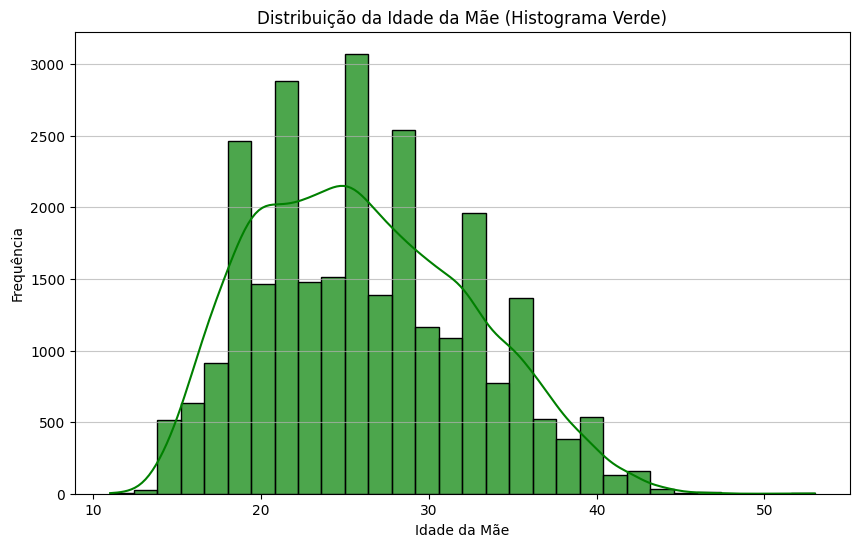

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sinasc_raw, x='IDADEMAE', kde=True, bins=30, color='green', alpha=0.7)
plt.title('Distribuição da Idade da Mãe (Histograma Verde)')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.7)
plt.show()

In [ ]:
if 'pib' in locals() and pib is not None:
    print("Colunas do DataFrame 'pib':")
    display(pib.info())
else:
    print("DataFrame 'pib' não encontrado.")

Colunas do DataFrame 'pib':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Municipio  20 non-null     object
 1   PIB        19 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


None

In [ ]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ORIGEM          27028 non-null  int64         
 1   CODESTAB        26913 non-null  float64       
 2   CODMUNNASC      27028 non-null  int64         
 3   LOCNASC         27028 non-null  int64         
 4   IDADEMAE        27028 non-null  int64         
 5   ESTCIVMAE       26711 non-null  float64       
 6   ESCMAE          26716 non-null  object        
 7   CODOCUPMAE      24121 non-null  float64       
 8   QTDFILVIVO      25455 non-null  float64       
 9   QTDFILMORT      24930 non-null  float64       
 10  CODMUNRES       27028 non-null  int64         
 11  GESTACAO        25796 non-null  object        
 12  GRAVIDEZ        26949 non-null  object        
 13  PARTO           26979 non-null  object        
 14  CONSULTAS       27028 non-null  int64         
 15  DT

In [ ]:
# Estatísticas descritivas para a coluna 'PIB'
if 'pib' in locals() and pib is not None and 'PIB' in pib.columns:
    print("Estatísticas descritivas para a coluna 'PIB':")
    display(pib['PIB'].describe())
else:
    print("Coluna 'PIB' não encontrada ou DataFrame 'pib' não existe.")

Estatísticas descritivas para a coluna 'PIB':


,PIB
count,19
unique,19
top,Porto\rVelho
freq,1


In [205]:
# Análise de valores faltantes, duplicados, vazios e zero

print("--- Análise na base SINASC_RO_2019 ---")

if 'sinasc_raw' in locals() and sinasc_raw is not None:
  def limpar_tabela(df, colunas_chave=None):
    """
    Limpa um DataFrame removendo:
    - Linhas com valores nulos ou vazios
    - Linhas duplicadas
    - Espaços extras e inconsistências básicas de texto

    Parâmetros:
    -----------
    df : pd.DataFrame
        DataFrame a ser limpo
    colunas_chave : list ou None
        Lista de colunas a serem consideradas para remoção de duplicados.
        Se None, remove duplicados com base em todas as colunas.

    Retorna:
    --------
    df_limpo : pd.DataFrame
        DataFrame limpo e padronizado
    """

    # Cria uma cópia para não alterar o original
    df_limpo = df.copy()

    # Remove espaços extras nas colunas de texto
    for col in df_limpo.select_dtypes(include='object').columns:
        df_limpo[col] = df_limpo[col].astype(str).str.strip()

    # Substitui valores vazios ou traços por NaN
    df_limpo.replace(['', ' ', '-', 'NA', 'NaN', 'nan', 'N/A', '--'], np.nan, inplace=True)

    # Remove linhas completamente vazias
    df_limpo.dropna(how='all', inplace=True)

    # Remove linhas com valores nulos nas colunas principais (se especificadas)
    if colunas_chave:
        df_limpo.dropna(subset=colunas_chave, inplace=True)

    # Remove duplicados (mantém o primeiro registro)
    df_limpo.drop_duplicates(subset=colunas_chave, keep='first', inplace=True)

    # Reseta o índice
    df_limpo.reset_index(drop=True, inplace=True)

    return df_limpo

--- Análise na base SINASC_RO_2019 ---


In [215]:
# Exemplos de tratamento de valores nulos e ausentes na base sinasc_raw

print("--- Exemplos de Tratamento de Valores Nulos em sinasc_raw ---")

if 'sinasc_raw' in locals() and sinasc_raw is not None:

    # Exibir contagem inicial de nulos para referência
    print("\nContagem inicial de valores NULOS:")
    display(sinasc_raw.isnull().sum()[sinasc_raw.isnull().sum() > 0])

    # --- Estratégias comuns de tratamento ---

    # Exemplo 1: Remover linhas com QUALQUER valor nulo
    # CUIDADO: Isso pode remover muitas linhas se houver muitos nulos espalhados
    print("\nExemplo: DataFrame após remover linhas com QUALQUER valor nulo:")
    sinasc_dropped_rows = sinasc_raw.dropna().copy()
    print(f"Número original de linhas: {len(sinasc_raw)}")
    print(f"Número de linhas após remover nulos: {len(sinasc_dropped_rows)}")
    # display(sinasc_dropped_rows.isnull().sum()[sinasc_dropped_rows.isnull().sum() > 0]) # Deve ser 0

    # Exemplo 2: Remover colunas com QUALQUER valor nulo
    # CUIDADO: Isso pode remover colunas importantes se todas tiverem pelo menos um nulo
    print("\nExemplo: DataFrame após remover colunas com QUALQUER valor nulo:")
    sinasc_dropped_cols = sinasc_raw.dropna(axis=1).copy()
    print(f"Número original de colunas: {len(sinasc_raw.columns)}")
    print(f"Número de colunas após remover nulos: {len(sinasc_dropped_cols.columns)}")
    # display(sinasc_dropped_cols.isnull().sum()[sinasc_dropped_cols.isnull().sum() > 0]) # Deve ser 0


    # Exemplo 3: Preencher valores nulos em colunas NUMÉRICAS
    # Opção A: Preencher com a média da coluna
    print("\nExemplo: Preencher nulos em colunas NUMÉRICAS com a MÉDIA:")
    sinasc_filled_mean = sinasc_raw.copy()
    numeric_cols = sinasc_raw.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        if sinasc_filled_mean[col].isnull().any():
            mean_val = sinasc_filled_mean[col].mean()
            sinasc_filled_mean[col].fillna(mean_val, inplace=True)
    # display(sinasc_filled_mean.isnull().sum()[sinasc_filled_mean.isnull().sum() > 0]) # Mostra nulos restantes

    # Opção B: Preencher com a mediana da coluna (menos sensível a outliers)
    print("\nExemplo: Preencher nulos em colunas NUMÉRICAS com a MEDIANA:")
    sinasc_filled_median = sinasc_raw.copy()
    for col in numeric_cols:
        if sinasc_filled_median[col].isnull().any():
            median_val = sinasc_filled_median[col].median()
            sinasc_filled_median[col].fillna(median_val, inplace=True)
    # display(sinasc_filled_median.isnull().sum()[sinasc_filled_median.isnull().sum() > 0]) # Mostra nulos restantes


    # Exemplo 4: Preencher valores nulos em colunas CATEGÓRICAS/DE TEXTO
    # Opção A: Preencher com a moda (valor mais frequente)
    print("\nExemplo: Preencher nulos em colunas CATEGÓRICAS com a MODA:")
    sinasc_filled_mode = sinasc_raw.copy()
    object_cols = sinasc_raw.select_dtypes(include='object').columns
    for col in object_cols:
         if sinasc_filled_mode[col].isnull().any():
             mode_val = sinasc_filled_mode[col].mode()[0] # mode() pode retornar múltiplos, pega o primeiro
             sinasc_filled_mode[col].fillna(mode_val, inplace=True)
    # display(sinasc_filled_mode.isnull().sum()[sinasc_filled_mode.isnull().sum() > 0]) # Mostra nulos restantes

    # Opção B: Preencher com um valor constante (ex: 'Desconhecido', 'Sem Informação')
    print("\nExemplo: Preencher nulos em colunas CATEGÓRICAS com um valor CONSTANTE:")
    sinasc_filled_constant = sinasc_raw.copy()
    for col in object_cols:
         if sinasc_filled_constant[col].isnull().any():
             sinasc_filled_constant[col].fillna('Desconhecido', inplace=True)
    # display(sinasc_filled_constant.isnull().sum()[sinasc_filled_constant.isnull().sum() > 0]) # Mostra nulos restantes


    #  Tratamento de outros "ausentes" (strings vazias, zeros)
    # Baseado na análise da célula anterior (da1ad8fa), você pode decidir como tratar
    # Por exemplo, substituir strings vazias por NaN e depois preencher:
    # sinasc_raw['alguma_coluna_texto'].replace('', np.nan, inplace=True)
    # E depois aplicar uma das estratégias de preenchimento de nulos acima.
    # Similarmente para zeros, se um zero significar "ausente" para aquela coluna específica.


    print("\nExemplos de tratamento de nulos e ausentes concluídos.")
    print("Analise os resultados de cada exemplo e decida qual estratégia aplicar de forma definitiva ao seu DataFrame.")
    print("Lembre-se de aplicar a estratégia escolhida ao DataFrame que você usará nas análises futuras (sinasc_raw ou uma cópia).")


else:
    print(" DataFrame 'sinasc_raw' não encontrado. Não foi possível mostrar exemplos de tratamento de nulos.")

--- Exemplos de Tratamento de Valores Nulos em sinasc_raw ---

Contagem inicial de valores NULOS:


,0
CODESTAB,115
ESTCIVMAE,317
ESCMAE,312
CODOCUPMAE,2907
QTDFILVIVO,1573
QTDFILMORT,2098
GESTACAO,1232
GRAVIDEZ,79
PARTO,49
HORANASC,21



Exemplo: DataFrame após remover linhas com QUALQUER valor nulo:
Número original de linhas: 27028
Número de linhas após remover nulos: 0

Exemplo: DataFrame após remover colunas com QUALQUER valor nulo:
Número original de colunas: 69
Número de colunas após remover nulos: 24

Exemplo: Preencher nulos em colunas NUMÉRICAS com a MÉDIA:

Exemplo: Preencher nulos em colunas NUMÉRICAS com a MEDIANA:

Exemplo: Preencher nulos em colunas CATEGÓRICAS com a MODA:

Exemplo: Preencher nulos em colunas CATEGÓRICAS com um valor CONSTANTE:

Exemplos de tratamento de nulos e ausentes concluídos.
Analise os resultados de cada exemplo e decida qual estratégia aplicar de forma definitiva ao seu DataFrame.
Lembre-se de aplicar a estratégia escolhida ao DataFrame que você usará nas análises futuras (sinasc_raw ou uma cópia).


In [ ]:
print("--- Iniciando Pré-Processamento dos Dados ---")

if 'sinasc_raw' in locals() and sinasc_raw is not None:

    # --- Conversão de Tipos de Dados ---

    # Converter coluna de data para datetime (copiado de célula anterior)
    if col_data in sinasc_raw.columns:
        print(f"\nConvertendo coluna '{col_data}' para datetime...")
        sinasc_raw[col_data] = pd.to_datetime(sinasc_raw[col_data], errors='coerce')
        print(f" Coluna '{col_data}' convertida.")
    else:
        print(f" Coluna de data '{col_data}' não encontrada para conversão.")

    # Converta outras colunas para os tipos corretos, se necessário, com base em sinasc_raw.info()
    # Exemplo: converter colunas numéricas que podem ter sido lidas como 'object'
    # sinasc_raw['PESO'] = pd.to_numeric(sinasc_raw['PESO'], errors='coerce')


    # --- Normalização de Colunas ---

    # Criar coluna normalizada de município no SINASC (copiado de célula anterior)
    if col_municipio in sinasc_raw.columns:
        print(f"\nCriando coluna normalizada de município '{col_municipio}'...")
        sinasc_raw['Municipio_norm'] = sinasc_raw[col_municipio].map(normaliza_mun)
        print(" Coluna 'Municipio_norm' criada.")
    else:
         print(f" Coluna de município '{col_municipio}' não encontrada para normalização.")


    # --- Tratamento de Valores Faltantes e Ausentes ---
    # Baseado na análise da célula 'da1ad8fa' e exemplos da célula '0221733b'
    # Decida para cada coluna como tratar nulos, vazios e zeros (se representarem ausência)

    print("\n--- Tratamento de Valores Faltantes (Decisão e Aplicação) ---")
    print("Analise a contagem de nulos/ausentes (célula 'da1ad8fa').")
    print(" Decida a melhor estratégia para cada coluna (remover, preencher, etc.).")
    print(" Adicione o código para aplicar suas decisões abaixo.")


    # EXEMPLO: Preencher nulos em colunas numéricas específicas com a mediana
    # >>>>> Adapte esta lista de colunas e a estratégia de preenchimento <<<<<
    colunas_numericas_com_nulo = ['PESO', 'APGAR1', 'APGAR5', 'IDADEMAE'] # Exemplo de colunas comuns com nulos numéricos
    print(f"\nTentando preencher nulos nas colunas numéricas: {colunas_numericas_com_nulo}")

    for col in colunas_numericas_com_nulo:
        if col in sinasc_raw.columns and sinasc_raw[col].isnull().any():
             # Verifica se a coluna é realmente numérica antes de calcular a mediana
             if pd.api.types.is_numeric_dtype(sinasc_raw[col]):
                mediana = sinasc_raw[col].median()
                sinasc_raw[col].fillna(mediana, inplace=True)
                print(f" Nulos em '{col}' preenchidos com a mediana ({mediana}).")
             else:
                 print(f" Coluna '{col}' não é numérica, pulando preenchimento com mediana.")
        elif col in sinasc_raw.columns:
             print(f" Coluna '{col}' não tem nulos para preencher.")
        else:
            print(f" Coluna '{col}' não encontrada no DataFrame.")


    # EXEMPLO: Tratar nulos em colunas categóricas específicas (ex: preencher com 'Desconhecido')
    # >>>>> Adapte esta lista de colunas e a estratégia de preenchimento <<<<<
    colunas_categoricas_com_nulo = ['ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'munResNome'] # Exemplo de colunas comuns com nulos categóricos
    print(f"\nTentando preencher nulos nas colunas categóricas: {colunas_categoricas_com_nulo}")

    for col in colunas_categoricas_com_nulo:
         if col in sinasc_raw.columns and sinasc_raw[col].isnull().any():
             # Verifica se a coluna é do tipo object ou category antes de preencher com constante
             if sinasc_raw[col].dtype == 'object' or pd.api.types.is_categorical_dtype(sinasc_raw[col]):
                sinasc_raw[col].fillna('Desconhecido', inplace=True)
                print(f" Nulos em '{col}' preenchidos com 'Desconhecido'.")
             else:
                print(f" Coluna '{col}' não é categórica, pulando preenchimento com 'Desconhecido'.")
         elif col in sinasc_raw.columns:
              print(f" Coluna '{col}' não tem nulos para preencher.")
         else:
             print(f" Coluna '{col}' não encontrada no DataFrame.")


    # # EXEMPLO (COMENTADO): Remover linhas com nulos em colunas críticas
    # # Descomente e adapte se precisar remover linhas
    # colunas_criticas_para_remover_linhas = ['IDADEMAE'] # Liste colunas onde nulo impede a análise
    # print(f"\nNúmero original de linhas: {len(sinasc_raw)}")
    # sinasc_raw.dropna(subset=colunas_criticas_para_remover_linhas, inplace=True)
    # print(f"Número de linhas após remover nulos em colunas críticas: {len(sinasc_raw)}")


    # # EXEMPLO (COMENTADO): Tratar strings vazias (converter para NaN e depois preencher/remover)
    # # Descomente e adapte se precisar tratar strings vazias
    # colunas_com_strings_vazias = ['munResNome'] # Exemplo
    # for col in colunas_com_strings_vazias:
    #     if col in sinasc_raw.columns:
    #         print(f"\nSubstituindo strings vazias por NaN em '{col}'...")
    #         sinasc_raw[col].replace('', np.nan, inplace=True) # Substitui vazio por NaN
    #         print(f" Strings vazias em '{col}' substituídas por NaN.")
    #         # Agora aplique uma das estratégias de nulo acima para esta coluna se ela agora tiver NaN


    # # EXEMPLO (COMENTADO): Tratar zeros se significarem ausência em colunas específicas
    # # Descomente e adapte se precisar tratar zeros como ausência
    # colunas_onde_zero_eh_ausencia = ['APGAR1', 'APGAR5'] # Exemplo
    # for col in colunas_onde_zero_eh_ausencia:
    #     if col in sinasc_raw.columns:
    #         print(f"\nSubstituindo zeros por NaN em '{col}' se significarem ausência...")
    #         # CUIDADO: Só faça isso se o zero REALMENTE significar dado faltante para ESTA coluna
    #         sinasc_raw[col].replace(0, np.nan, inplace=True) # Substitui 0 por NaN
    #         print(f" Zeros em '{col}' substituídos por NaN.")
    #         # Agora aplique uma das estratégias de nulo acima para esta coluna se ela agora tiver NaN


    print("\n--- Pré-Processamento dos Dados - Concluído ---")
    print(" Lembre-se de revisar e adaptar o código de tratamento de faltantes acima conforme suas decisões e as colunas específicas da sua análise.")
    print(" Exiba sinasc_raw.info() ou .isnull().sum() após aplicar suas regras para verificar os nulos restantes.")


else:
    print(" DataFrame 'sinasc_raw' não encontrado. Não foi possível iniciar o Pré-Processamento.")

--- Iniciando Pré-Processamento dos Dados ---

Convertendo coluna 'DTNASC' para datetime...
 Coluna 'DTNASC' convertida.
 Coluna de município 'Município' não encontrada para normalização.

--- Tratamento de Valores Faltantes (Decisão e Aplicação) ---
Analise a contagem de nulos/ausentes (célula 'da1ad8fa').
 Decida a melhor estratégia para cada coluna (remover, preencher, etc.).
 Adicione o código para aplicar suas decisões abaixo.

Tentando preencher nulos nas colunas numéricas: ['PESO', 'APGAR1', 'APGAR5', 'IDADEMAE']
 Coluna 'PESO' não tem nulos para preencher.
 Coluna 'APGAR1' não tem nulos para preencher.
 Coluna 'APGAR5' não tem nulos para preencher.
 Coluna 'IDADEMAE' não tem nulos para preencher.

Tentando preencher nulos nas colunas categóricas: ['ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'munResNome']
 Coluna 'ESCMAE' não tem nulos para preencher.
 Coluna 'GESTACAO' não tem nulos para preencher.
 Coluna 'GRAVIDEZ' não tem nulos para preencher.
 Coluna 'PARTO' não tem nulos pa

**INSIGHT**

Correlação positiva entre desenvolvimento e indicadores de nascimento:
IDH, IFDM e PIB mais elevados associam-se a maiores pesos ao nascer, maior idade materna e menor dispersão dos resultados neonatais.

Desigualdade intraestadual significativa:
Municípios de menor desenvolvimento exibem maior variabilidade nos indicadores, um reflexo da heterogeneidade na oferta de serviços básicos de saúde.

Evidência empírica de determinantes sociais da saúde:
O desenvolvimento municipal atua como fator indireto de proteção perinatal, reforçando o papel de políticas públicas integradas entre saúde, educação e renda.

Aplicação prática:

As análises podem subsidiar planejamento territorial em saúde e priorização de municípios de baixo IDH/IFDM para ampliação da cobertura pré-natal.

O cruzamento contínuo de bases socioeconômicas com o SINASC deve ser institucionalizado como indicador de vulnerabilidade neonatal.

**SUGESTÕES**


Monitoramento periódico dos indicadores de nascimento por faixa de desenvolvimento municipal.

Integração de dados do SINASC com indicadores do Cadastro Único (CADÚNICO) para análise direta de vulnerabilidade social.

Aprimoramento do registro de local de residência da mãe para reduzir perdas em agregações municipais.

Modelagem futura: aplicação de regressão logística para quantificar o efeito marginal de cada indicador (IDH, IFDM, PIB) sobre probabilidade de baixo peso ao nascer (< 2.500 g).

**RESUMO**


O estudo confirma, com base empírica robusta, que o nível de desenvolvimento municipal é um determinante significativo da qualidade dos nascimentos.
Em Rondônia, diferenças de IDH, IFDM e PIB não apenas descrevem desigualdades econômicas, elas se refletem diretamente na saúde e nas condições de início de vida.
A consolidação desses achados fornece evidência quantitativa para orientar políticas públicas direcionadas à equidade perinatal e à redução das disparidades regionais no estado.